In [1]:
import chollaread
import yt
import trident
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import colorcet as cc
from matplotlib.cm import get_cmap

/Users/sofimar/opt/anaconda3/envs/yt_st/lib/python3.9/_collections_abc.py:768: MatplotlibDeprecationWarning: The global colormaps dictionary is no longer considered public API.
  self[key]


In [2]:
ds = chollaread.load('/Users/sofimar/Desktop/Summer Research/140.h5.0', cell_size_cgs=(10/256)*chollaread.kpc)

yt : [INFO     ] 2022-02-08 18:44:01,297 Parameters: current_time              = 0.0
yt : [INFO     ] 2022-02-08 18:44:01,298 Parameters: domain_dimensions         = [512 256 256]
yt : [INFO     ] 2022-02-08 18:44:01,298 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2022-02-08 18:44:01,299 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22]
yt : [INFO     ] 2022-02-08 18:44:01,299 Parameters: cosmological_simulation   = 0.0


In [3]:
def make_ray(x0, y0, z0, x, y, z):
    
    k = (3.086E+21)*10 # Code length
    
    ray_start = np.array([x0,y0,z0])*k
    ray_end = np.array([x,y,z])*k
    
    ray = trident.make_simple_ray(ds,
                                 start_position=ray_start,
                                 end_position=ray_end,
                                 data_filename= 'ray_.h5',
                                 lines='all',
                                 ftype='gas')
    return ray

In [4]:
def slicep(direction, ray1=False, ray2=False):
    
    get_cmap("cet_bmw")
    sl = yt.SlicePlot(ds, direction, [("density")])
    sl.set_cmap(("density"), "cet_bmw")
    
    if ray1==True:
        sl.annotate_ray(ray_, arrow=True)
    if ray2==True:
        sl.annotate_ray(ray_2, arrow=True)
    
    sl.show()

In [5]:
def spec_avg(x0, y0, z0, x, y, z, Nx, Nz,
             line, lmin, lmax,
             el=None, rom_num=None, lrest=None, gamma=None, f_value=None, amu=None,
             DIY=False, ind_p=True):
    
    # Make array of rays
    k = (3.086E+21)*10 # Code length
    cu = 1/256
    
    arrays = []
    
    
    for i in range(Nx):
        for j in range(Nz):
        
            ray_start = np.array([x0+(i*cu),y0,z0+(j*cu)])*k
            ray_end = np.array([x+(i*cu),y,z+(j*cu)])*k

            ray = trident.make_simple_ray(ds,
                                         start_position=ray_start,
                                         end_position=ray_end,
                                         data_filename= 'ray.h5',
                                         lines='all',
                                         ftype='gas')



            sg = trident.SpectrumGenerator(lambda_min= lmin, lambda_max= lmax, dlambda=0.01)
            
            if DIY==False:
            
                sg.make_spectrum(ray, lines=[line])
                sg.save_spectrum('spec.txt')
                
            else:
                sg.add_line_to_database(el, rom_num, lrest, gamma,f_value, field=None, identifier=line)

                sg.make_spectrum(ray, lines=[line])
                sg.save_spectrum('spec.txt')

            f = np.loadtxt('spec.txt')
            lam = f[:,0] # All rows, 1st column
            flux = f[:,2]

            tog = np.array([lam, flux])
            arrays.append(tog)
        
  
    
    # Average Flux
    flux_list = []
    avg = []

    for n in range(Nx*Nz): # N = Nx * Nz     
        flux_ = arrays[n][1]
        flux_list.append(flux_) # Append flux to a list
        flux_arr = np.array(flux_list) # Turn list into an array
        flux_a = flux_arr.T # Transpose array
        
    for m in range(len(flux_a)):
        avg_ = np.average(flux_a[m])
        avg.append(avg_)
        
    reds = get_cmap('cet_CET_L18')
    colors = reds(np.linspace(0.25,1,Nx*Nz))
        
    fig = plt.figure(figsize=(15, 5))
    
    if ind_p==True:
        for p in range(Nx*Nz):
            plt.plot(arrays[0][0], arrays[p][1], alpha=0.5, color=colors[p])
    else:
        pass
    plt.plot(arrays[0][0], avg, color='black', label = "Average Spectrum", linewidth=1.75)
    plt.xlim(lmin, lmax)
    plt.title(line+" '140.h5.0'")
    plt.legend(fontsize='large')
    plt.xlabel('Wavelength')
    plt.ylabel('Relative Flux')
    
    return arrays[0][0], avg
    

In [6]:
def get_N(a0, a):
    return (a-a0)*256

# Slice Plot units to Projection Plot units
def stp_z(z):
    return(z*10)-5

def stp_x(x):
    return (x*10)-10

yt : [INFO     ] 2022-02-08 20:23:03,968 Getting segment at z = 0.0: [0.455  0.     0.2465] unitary to [0.455  0.5    0.2465] unitary.
/Users/sofimar/opt/anaconda3/envs/yt_st/lib/python3.9/site-packages/yt/units/yt_array.py:1416: RuntimeWarning: invalid value encountered in true_divide
  out_arr = func(np.asarray(inps[0]), np.asarray(inps[1]),
yt : [INFO     ] 2022-02-08 20:23:03,971 Getting subsegment: [0.45500000000000007 unitary, 0.0 unitary, 0.24650000000000002 unitary] to [0.45500000000000007 unitary, 0.5 unitary, 0.24650000000000002 unitary].
yt : [INFO     ] 2022-02-08 20:23:04,646 Saving field data to yt dataset: ray_.h5.
yt : [INFO     ] 2022-02-08 20:23:04,723 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-02-08 20:23:04,724 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-02-08 20:23:04,724 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-02-08 20:23:04,724 Parameters: domain_right_edge    


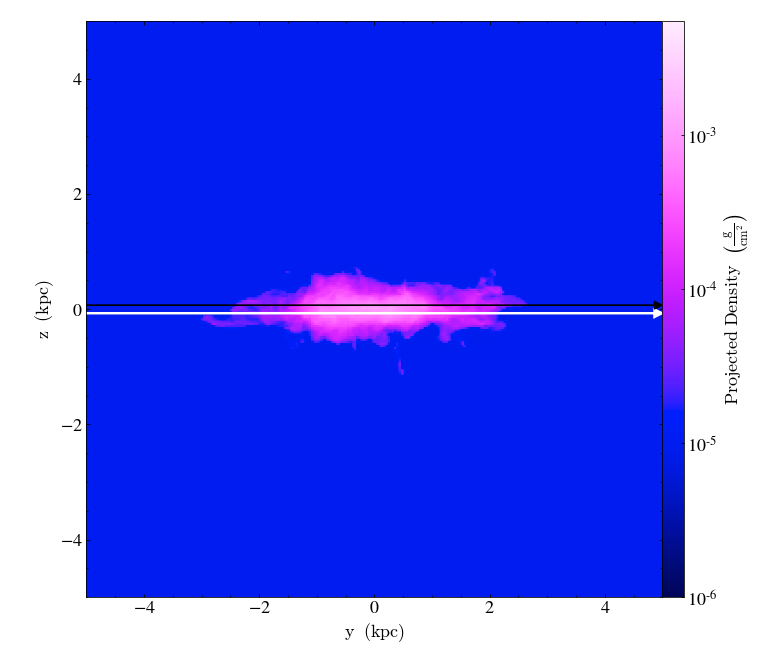

yt : [INFO     ] 2022-02-08 20:23:11,298 Projection completed
yt : [INFO     ] 2022-02-08 20:23:11,298 xlim = 0.000000 61720000000000002097152.000000
yt : [INFO     ] 2022-02-08 20:23:11,299 ylim = 0.000000 30860000000000001048576.000000
yt : [INFO     ] 2022-02-08 20:23:11,299 xlim = 0.000000 61720000000000002097152.000000
yt : [INFO     ] 2022-02-08 20:23:11,299 ylim = 0.000000 30860000000000001048576.000000
yt : [INFO     ] 2022-02-08 20:23:11,300 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800
/Users/sofimar/opt/anaconda3/envs/yt_st/lib/python3.9/site-packages/yt/visualization/base_plot_types.py:255: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  self.image = self.axes.imshow(
/Users/sofimar/opt/anaconda3/envs/yt_st/lib/python3.9/site-packages/yt/units/yt_array.py:1416: RuntimeWarning: inval


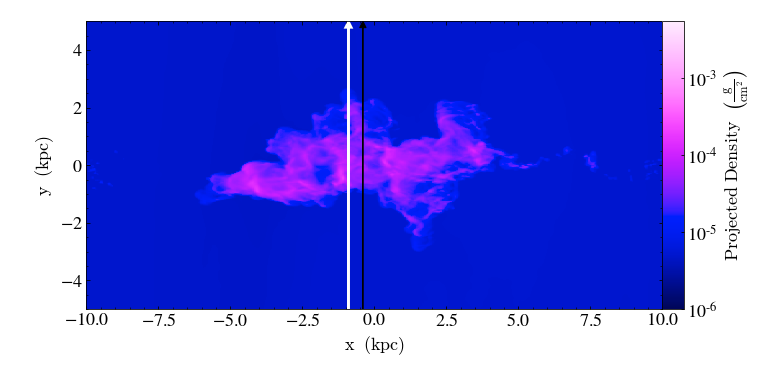

yt : [INFO     ] 2022-02-08 20:23:14,299 Projection completed
yt : [INFO     ] 2022-02-08 20:23:14,299 xlim = 0.000000 30860000000000001048576.000000
yt : [INFO     ] 2022-02-08 20:23:14,299 ylim = 0.000000 61720000000000002097152.000000
yt : [INFO     ] 2022-02-08 20:23:14,300 xlim = 0.000000 30860000000000001048576.000000
yt : [INFO     ] 2022-02-08 20:23:14,300 ylim = 0.000000 61720000000000002097152.000000
yt : [INFO     ] 2022-02-08 20:23:14,301 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800
/Users/sofimar/opt/anaconda3/envs/yt_st/lib/python3.9/site-packages/yt/visualization/base_plot_types.py:255: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  self.image = self.axes.imshow(
/Users/sofimar/opt/anaconda3/envs/yt_st/lib/python3.9/_collections_abc.py:940: MatplotlibDeprecationWarning: 
The ma


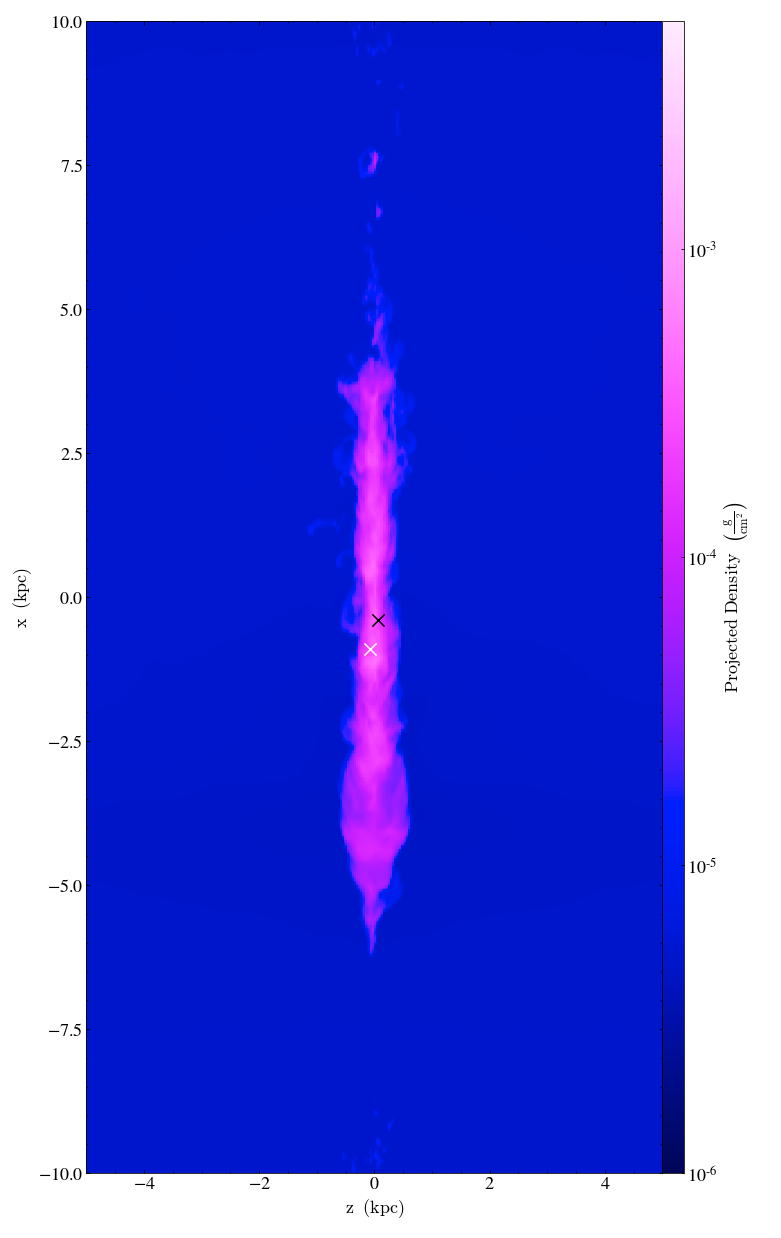

In [17]:
ray1 = make_ray(0.91,0,0.493,0.91,1,0.493)
ray2 = make_ray(0.96,0,0.507,0.96,1,0.507)

px = yt.ProjectionPlot(ds, 'x', 'density')
px.set_cmap(("density"), "cet_bmw")
px.set_zlim([("gas", "density")], 1*10**-6, 5.5*10**-3)
px.annotate_ray(ray1, arrow=True)
px.annotate_ray(ray2, arrow=True, plot_args={"color": "black"})
px.show()

pz = yt.ProjectionPlot(ds, 'z', 'density')
pz.set_cmap(("density"), "cet_bmw")
pz.set_zlim([("gas", "density")], 1*10**-6, 5.5*10**-3)
pz.annotate_ray(ray1, arrow=True)
pz.annotate_ray(ray2, arrow=True, plot_args={"color": "black"})
pz.show()

py = yt.ProjectionPlot(ds, 'y', 'density')
py.set_cmap(("density"), "cet_bmw")
py.set_zlim([("gas", "density")], 1*10**-6, 5.5*10**-3)
py.annotate_marker((-0.07,-0.9), coord_system="plot", plot_args={"color":"white", "s": 150})
py.annotate_marker((0.07, -0.4), coord_system="plot", plot_args={"color":"black", "s": 150})
py.show()

In [12]:
stp_z(0.493)

-0.07000000000000028

In [16]:
stp_z(0.507)

0.07000000000000028

In [18]:
nxs = get_N(0.91, 0.96)
nzs = get_N(0.493, 0.507)

print(nxs, nzs)

12.799999999999983 3.584000000000003


## C IV

yt : [INFO     ] 2022-02-08 20:24:49,528 Getting segment at z = 0.0: [0.455  0.     0.2465] unitary to [0.455  0.5    0.2465] unitary.
/Users/sofimar/opt/anaconda3/envs/yt_st/lib/python3.9/site-packages/yt/units/yt_array.py:1416: RuntimeWarning: invalid value encountered in true_divide
  out_arr = func(np.asarray(inps[0]), np.asarray(inps[1]),
yt : [INFO     ] 2022-02-08 20:24:49,530 Getting subsegment: [0.45500000000000007 unitary, 0.0 unitary, 0.24650000000000002 unitary] to [0.45500000000000007 unitary, 0.5 unitary, 0.24650000000000002 unitary].
yt : [INFO     ] 2022-02-08 20:24:50,254 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-02-08 20:24:50,330 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-02-08 20:24:50,330 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-02-08 20:24:50,331 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-02-08 20:24:50,331 Parameters: domain_right_edge     

yt : [INFO     ] 2022-02-08 20:24:59,375 Getting segment at z = 0.0: [0.45890625 0.         0.25040625] unitary to [0.45890625 0.5        0.25040625] unitary.
yt : [INFO     ] 2022-02-08 20:24:59,377 Getting subsegment: [0.45890625000000007 unitary, 0.0 unitary, 0.25040625000000005 unitary] to [0.45890625000000007 unitary, 0.5 unitary, 0.25040625000000005 unitary].
yt : [INFO     ] 2022-02-08 20:25:00,026 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-02-08 20:25:00,102 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-02-08 20:25:00,102 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-02-08 20:25:00,103 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-02-08 20:25:00,103 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2022-02-08 20:25:00,103 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2022-02-08 20:25:00,104 Setting ins

yt : [INFO     ] 2022-02-08 20:25:04,309 Getting subsegment: [0.46085937500000007 unitary, 0.0 unitary, 0.252359375 unitary] to [0.46085937500000007 unitary, 0.5 unitary, 0.252359375 unitary].
yt : [INFO     ] 2022-02-08 20:25:05,038 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-02-08 20:25:05,118 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-02-08 20:25:05,118 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-02-08 20:25:05,118 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-02-08 20:25:05,119 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2022-02-08 20:25:05,119 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2022-02-08 20:25:05,120 Setting instrument to Custom
yt : [INFO     ] 2022-02-08 20:25:05,131 Allocating for 2.560e+02 particles (index particle type 'all')
yt : [INFO     ] 2022-02-08 20:25:05,135 Identified 1

yt : [INFO     ] 2022-02-08 20:25:09,936 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-02-08 20:25:10,011 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-02-08 20:25:10,011 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-02-08 20:25:10,012 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-02-08 20:25:10,012 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2022-02-08 20:25:10,012 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2022-02-08 20:25:10,013 Setting instrument to Custom
yt : [INFO     ] 2022-02-08 20:25:10,023 Allocating for 2.560e+02 particles (index particle type 'all')
yt : [INFO     ] 2022-02-08 20:25:10,027 Identified 1.210e+02 octs
yt : [INFO     ] 2022-02-08 20:25:10,114 Creating C_p3_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-02-08 20:25:10,117 Creating spectrum
Addi

yt : [INFO     ] 2022-02-08 20:25:14,868 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-02-08 20:25:14,868 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-02-08 20:25:14,868 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-02-08 20:25:14,869 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2022-02-08 20:25:14,869 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2022-02-08 20:25:14,871 Setting instrument to Custom
yt : [INFO     ] 2022-02-08 20:25:14,882 Allocating for 2.560e+02 particles (index particle type 'all')
yt : [INFO     ] 2022-02-08 20:25:14,887 Identified 1.210e+02 octs
yt : [INFO     ] 2022-02-08 20:25:14,977 Creating C_p3_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-02-08 20:25:14,980 Creating spectrum
Adding line - C IV 1548 [1548.187000 A]: : 100%|██████████| 256/256 [00:00<00:00, 6342

yt : [INFO     ] 2022-02-08 20:25:19,787 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-02-08 20:25:19,787 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-02-08 20:25:19,788 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2022-02-08 20:25:19,788 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2022-02-08 20:25:19,789 Setting instrument to Custom
yt : [INFO     ] 2022-02-08 20:25:19,800 Allocating for 2.560e+02 particles (index particle type 'all')
yt : [INFO     ] 2022-02-08 20:25:19,804 Identified 1.210e+02 octs
yt : [INFO     ] 2022-02-08 20:25:19,890 Creating C_p3_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-02-08 20:25:19,893 Creating spectrum
Adding line - C IV 1548 [1548.187000 A]: : 100%|██████████| 256/256 [00:00<00:00, 6269.77it/s]
yt : [INFO     ] 2022-02-08 20:25:20,004 Writing spectrum to ascii file: spec.txt.
yt 

yt : [INFO     ] 2022-02-08 20:25:24,629 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-02-08 20:25:24,629 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2022-02-08 20:25:24,630 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2022-02-08 20:25:24,631 Setting instrument to Custom
yt : [INFO     ] 2022-02-08 20:25:24,641 Allocating for 2.560e+02 particles (index particle type 'all')
yt : [INFO     ] 2022-02-08 20:25:24,645 Identified 1.210e+02 octs
yt : [INFO     ] 2022-02-08 20:25:24,732 Creating C_p3_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-02-08 20:25:24,735 Creating spectrum
Adding line - C IV 1548 [1548.187000 A]: : 100%|██████████| 256/256 [00:00<00:00, 6328.30it/s]
yt : [INFO     ] 2022-02-08 20:25:24,844 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-02-08 20:25:24,859 Getting segment at z = 0.0: [0.47257813 0.         

yt : [INFO     ] 2022-02-08 20:25:29,489 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2022-02-08 20:25:29,489 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2022-02-08 20:25:29,490 Setting instrument to Custom
yt : [INFO     ] 2022-02-08 20:25:29,500 Allocating for 2.560e+02 particles (index particle type 'all')
yt : [INFO     ] 2022-02-08 20:25:29,503 Identified 1.210e+02 octs
yt : [INFO     ] 2022-02-08 20:25:29,590 Creating C_p3_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-02-08 20:25:29,593 Creating spectrum
Adding line - C IV 1548 [1548.187000 A]: : 100%|██████████| 256/256 [00:00<00:00, 5642.13it/s]
yt : [INFO     ] 2022-02-08 20:25:29,712 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-02-08 20:25:29,727 Getting segment at z = 0.0: [0.47453125 0.         0.24845312] unitary to [0.47453125 0.5        0.24845312] unitary.
yt : [INFO     ] 2022-02-08 20:25:29,

yt : [INFO     ] 2022-02-08 20:25:34,436 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2022-02-08 20:25:34,437 Setting instrument to Custom
yt : [INFO     ] 2022-02-08 20:25:34,447 Allocating for 2.560e+02 particles (index particle type 'all')
yt : [INFO     ] 2022-02-08 20:25:34,451 Identified 1.210e+02 octs
yt : [INFO     ] 2022-02-08 20:25:34,538 Creating C_p3_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-02-08 20:25:34,541 Creating spectrum
Adding line - C IV 1548 [1548.187000 A]: : 100%|██████████| 256/256 [00:00<00:00, 5810.83it/s]
yt : [INFO     ] 2022-02-08 20:25:34,656 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-02-08 20:25:34,671 Getting segment at z = 0.0: [0.47648438 0.         0.25040625] unitary to [0.47648438 0.5        0.25040625] unitary.
yt : [INFO     ] 2022-02-08 20:25:34,672 Getting subsegment: [0.47648437500000007 unitary, 0.0 unitary, 0.25040625000000005 unitary] to [0.47648437500000007 unita

yt : [INFO     ] 2022-02-08 20:25:39,321 Setting instrument to Custom
yt : [INFO     ] 2022-02-08 20:25:39,331 Allocating for 2.560e+02 particles (index particle type 'all')
yt : [INFO     ] 2022-02-08 20:25:39,335 Identified 1.210e+02 octs
yt : [INFO     ] 2022-02-08 20:25:39,421 Creating C_p3_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-02-08 20:25:39,424 Creating spectrum
Adding line - C IV 1548 [1548.187000 A]: : 100%|██████████| 256/256 [00:00<00:00, 6115.50it/s]
yt : [INFO     ] 2022-02-08 20:25:39,533 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-02-08 20:25:39,548 Getting segment at z = 0.0: [0.4784375  0.         0.25235937] unitary to [0.4784375  0.5        0.25235937] unitary.
yt : [INFO     ] 2022-02-08 20:25:39,549 Getting subsegment: [0.47843750000000007 unitary, 0.0 unitary, 0.252359375 unitary] to [0.47843750000000007 unitary, 0.5 unitary, 0.252359375 unitary].
yt : [INFO     ] 2022-02-08 20:25:40,185 Saving field 

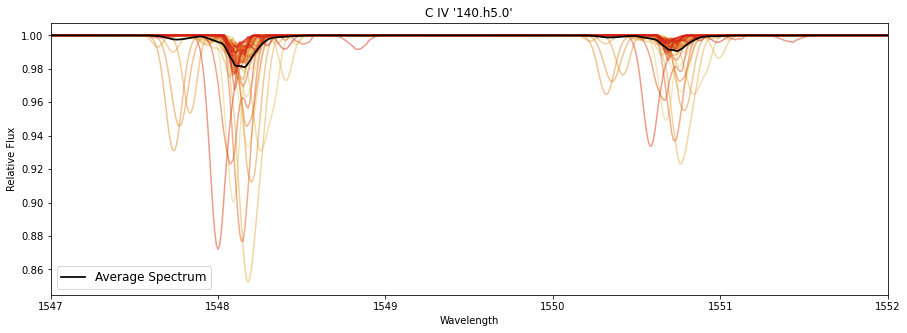

In [19]:
CIV = spec_avg(0.91,0,0.493,0.91,1,0.493, 13,4, 'C IV' ,1547,1552)

## Ly a

yt : [INFO     ] 2022-02-08 20:25:40,654 Getting segment at z = 0.0: [0.455  0.     0.2465] unitary to [0.455  0.5    0.2465] unitary.
/Users/sofimar/opt/anaconda3/envs/yt_st/lib/python3.9/site-packages/yt/units/yt_array.py:1416: RuntimeWarning: invalid value encountered in true_divide
  out_arr = func(np.asarray(inps[0]), np.asarray(inps[1]),
yt : [INFO     ] 2022-02-08 20:25:40,655 Getting subsegment: [0.45500000000000007 unitary, 0.0 unitary, 0.24650000000000002 unitary] to [0.45500000000000007 unitary, 0.5 unitary, 0.24650000000000002 unitary].
yt : [INFO     ] 2022-02-08 20:25:41,360 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-02-08 20:25:41,437 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-02-08 20:25:41,437 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-02-08 20:25:41,438 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-02-08 20:25:41,438 Parameters: domain_right_edge     

yt : [INFO     ] 2022-02-08 20:25:46,919 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-02-08 20:25:46,945 Getting segment at z = 0.0: [0.45695313 0.         0.24845312] unitary to [0.45695313 0.5        0.24845312] unitary.
yt : [INFO     ] 2022-02-08 20:25:46,947 Getting subsegment: [0.456953125 unitary, 0.0 unitary, 0.248453125 unitary] to [0.456953125 unitary, 0.5 unitary, 0.248453125 unitary].
yt : [INFO     ] 2022-02-08 20:25:47,605 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-02-08 20:25:47,685 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-02-08 20:25:47,686 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-02-08 20:25:47,686 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-02-08 20:25:47,687 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2022-02-08 20:25:47,687 Parameters: cosmological_simulation   = 0.0
y

yt : [INFO     ] 2022-02-08 20:25:53,386 Getting segment at z = 0.0: [0.45890625 0.         0.25040625] unitary to [0.45890625 0.5        0.25040625] unitary.
yt : [INFO     ] 2022-02-08 20:25:53,387 Getting subsegment: [0.45890625000000007 unitary, 0.0 unitary, 0.25040625000000005 unitary] to [0.45890625000000007 unitary, 0.5 unitary, 0.25040625000000005 unitary].
yt : [INFO     ] 2022-02-08 20:25:54,052 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-02-08 20:25:54,132 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-02-08 20:25:54,132 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-02-08 20:25:54,133 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-02-08 20:25:54,133 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2022-02-08 20:25:54,133 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2022-02-08 20:25:54,134 Setting ins

yt : [INFO     ] 2022-02-08 20:25:59,858 Getting segment at z = 0.0: [0.46085938 0.         0.25235937] unitary to [0.46085938 0.5        0.25235937] unitary.
yt : [INFO     ] 2022-02-08 20:25:59,859 Getting subsegment: [0.46085937500000007 unitary, 0.0 unitary, 0.252359375 unitary] to [0.46085937500000007 unitary, 0.5 unitary, 0.252359375 unitary].
yt : [INFO     ] 2022-02-08 20:26:00,483 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-02-08 20:26:00,560 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-02-08 20:26:00,560 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-02-08 20:26:00,561 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-02-08 20:26:00,561 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2022-02-08 20:26:00,561 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2022-02-08 20:26:00,562 Setting instrument to Custo

yt : [INFO     ] 2022-02-08 20:26:06,040 Getting subsegment: [0.46476562500000007 unitary, 0.0 unitary, 0.24650000000000002 unitary] to [0.46476562500000007 unitary, 0.5 unitary, 0.24650000000000002 unitary].
yt : [INFO     ] 2022-02-08 20:26:06,670 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-02-08 20:26:06,747 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-02-08 20:26:06,747 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-02-08 20:26:06,747 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-02-08 20:26:06,748 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2022-02-08 20:26:06,748 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2022-02-08 20:26:06,749 Setting instrument to Custom
yt : [INFO     ] 2022-02-08 20:26:06,759 Allocating for 2.560e+02 particles (index particle type 'all')
yt : [INFO     ] 2022-02-08 20:26:06,

yt : [INFO     ] 2022-02-08 20:26:12,177 Getting subsegment: [0.46671875000000007 unitary, 0.0 unitary, 0.248453125 unitary] to [0.46671875000000007 unitary, 0.5 unitary, 0.248453125 unitary].
yt : [INFO     ] 2022-02-08 20:26:12,857 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-02-08 20:26:12,932 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-02-08 20:26:12,933 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-02-08 20:26:12,933 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-02-08 20:26:12,933 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2022-02-08 20:26:12,934 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2022-02-08 20:26:12,935 Setting instrument to Custom
yt : [INFO     ] 2022-02-08 20:26:12,944 Allocating for 2.560e+02 particles (index particle type 'all')
yt : [INFO     ] 2022-02-08 20:26:12,948 Identified 1

yt : [INFO     ] 2022-02-08 20:26:18,908 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-02-08 20:26:18,985 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-02-08 20:26:18,985 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-02-08 20:26:18,986 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-02-08 20:26:18,986 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2022-02-08 20:26:18,986 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2022-02-08 20:26:18,987 Setting instrument to Custom
yt : [INFO     ] 2022-02-08 20:26:18,997 Allocating for 2.560e+02 particles (index particle type 'all')
yt : [INFO     ] 2022-02-08 20:26:19,001 Identified 1.210e+02 octs
yt : [INFO     ] 2022-02-08 20:26:19,088 Creating H_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-02-08 20:26:19,091 Creating spectrum
Adding 

yt : [INFO     ] 2022-02-08 20:26:24,978 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-02-08 20:26:24,978 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-02-08 20:26:24,978 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-02-08 20:26:24,979 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2022-02-08 20:26:24,979 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2022-02-08 20:26:24,980 Setting instrument to Custom
yt : [INFO     ] 2022-02-08 20:26:24,990 Allocating for 2.560e+02 particles (index particle type 'all')
yt : [INFO     ] 2022-02-08 20:26:24,994 Identified 1.210e+02 octs
yt : [INFO     ] 2022-02-08 20:26:25,083 Creating H_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-02-08 20:26:25,086 Creating spectrum
Adding line - Ly a [1215.670000 A]: : 100%|██████████| 256/256 [00:00<00:00, 738.54it/s] 

yt : [INFO     ] 2022-02-08 20:26:31,075 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-02-08 20:26:31,076 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-02-08 20:26:31,076 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2022-02-08 20:26:31,076 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2022-02-08 20:26:31,077 Setting instrument to Custom
yt : [INFO     ] 2022-02-08 20:26:31,087 Allocating for 2.560e+02 particles (index particle type 'all')
yt : [INFO     ] 2022-02-08 20:26:31,091 Identified 1.210e+02 octs
yt : [INFO     ] 2022-02-08 20:26:31,176 Creating H_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-02-08 20:26:31,179 Creating spectrum
Adding line - Ly a [1215.670000 A]: : 100%|██████████| 256/256 [00:00<00:00, 812.95it/s] 
yt : [INFO     ] 2022-02-08 20:26:31,524 Not adding continuum Ly C: insufficient column densit

yt : [INFO     ] 2022-02-08 20:26:37,015 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-02-08 20:26:37,015 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2022-02-08 20:26:37,016 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2022-02-08 20:26:37,017 Setting instrument to Custom
yt : [INFO     ] 2022-02-08 20:26:37,026 Allocating for 2.560e+02 particles (index particle type 'all')
yt : [INFO     ] 2022-02-08 20:26:37,030 Identified 1.210e+02 octs
yt : [INFO     ] 2022-02-08 20:26:37,117 Creating H_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-02-08 20:26:37,120 Creating spectrum
Adding line - Ly a [1215.670000 A]: : 100%|██████████| 256/256 [00:00<00:00, 777.07it/s] 
yt : [INFO     ] 2022-02-08 20:26:37,481 Not adding continuum Ly C: insufficient column density or out of range
yt : [INFO     ] 2022-02-08 20:26:37,481 Writing spectrum to ascii file

yt : [INFO     ] 2022-02-08 20:26:42,969 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2022-02-08 20:26:42,969 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2022-02-08 20:26:42,970 Setting instrument to Custom
yt : [INFO     ] 2022-02-08 20:26:42,979 Allocating for 2.560e+02 particles (index particle type 'all')
yt : [INFO     ] 2022-02-08 20:26:42,983 Identified 1.210e+02 octs
yt : [INFO     ] 2022-02-08 20:26:43,069 Creating H_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-02-08 20:26:43,073 Creating spectrum
Adding line - Ly a [1215.670000 A]: : 100%|██████████| 256/256 [00:00<00:00, 799.06it/s] 
yt : [INFO     ] 2022-02-08 20:26:43,424 Not adding continuum Ly C: insufficient column density or out of range
yt : [INFO     ] 2022-02-08 20:26:43,424 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-02-08 20:26:43,451 Getting segment at z = 0.0: [0.4784375  0.         

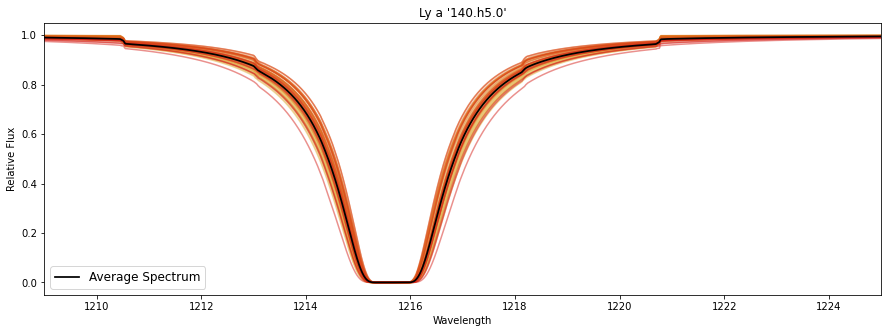

In [20]:
HI = spec_avg(0.91,0,0.493,0.91,1,0.493, 13,4, 'Ly a' ,1209,1225)

## O I 1302

yt : [INFO     ] 2022-02-08 20:26:44,919 Getting segment at z = 0.0: [0.455  0.     0.2465] unitary to [0.455  0.5    0.2465] unitary.
/Users/sofimar/opt/anaconda3/envs/yt_st/lib/python3.9/site-packages/yt/units/yt_array.py:1416: RuntimeWarning: invalid value encountered in true_divide
  out_arr = func(np.asarray(inps[0]), np.asarray(inps[1]),
yt : [INFO     ] 2022-02-08 20:26:44,920 Getting subsegment: [0.45500000000000007 unitary, 0.0 unitary, 0.24650000000000002 unitary] to [0.45500000000000007 unitary, 0.5 unitary, 0.24650000000000002 unitary].
yt : [INFO     ] 2022-02-08 20:26:45,557 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-02-08 20:26:45,635 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-02-08 20:26:45,635 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-02-08 20:26:45,636 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-02-08 20:26:45,636 Parameters: domain_right_edge     

Adding line - O I 925 [924.950000 A]: : 100%|██████████| 256/256 [00:00<00:00, 9128.83it/s]
yt : [INFO     ] 2022-02-08 20:26:52,755 77 out of 256 line components will be deposited as unresolved lines.
Adding line - O I 922 [922.008000 A]: : 100%|██████████| 256/256 [00:00<00:00, 7694.81it/s]
yt : [INFO     ] 2022-02-08 20:26:52,790 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-02-08 20:26:52,801 Getting segment at z = 0.0: [0.45695313 0.         0.25040625] unitary to [0.45695313 0.5        0.25040625] unitary.
yt : [INFO     ] 2022-02-08 20:26:52,802 Getting subsegment: [0.456953125 unitary, 0.0 unitary, 0.25040625000000005 unitary] to [0.456953125 unitary, 0.5 unitary, 0.25040625000000005 unitary].
yt : [INFO     ] 2022-02-08 20:26:53,435 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-02-08 20:26:53,513 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-02-08 20:26:53,514 Parameters: domain_dimensions         = [2 2 2]
yt : 

Adding line - O I 925 [924.950000 A]: : 100%|██████████| 256/256 [00:00<00:00, 9932.86it/s]
yt : [INFO     ] 2022-02-08 20:26:56,596 73 out of 256 line components will be deposited as unresolved lines.
Adding line - O I 922 [922.008000 A]: : 100%|██████████| 256/256 [00:00<00:00, 7448.57it/s]
yt : [INFO     ] 2022-02-08 20:26:56,632 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-02-08 20:26:56,642 Getting segment at z = 0.0: [0.45890625 0.         0.24845312] unitary to [0.45890625 0.5        0.24845312] unitary.
yt : [INFO     ] 2022-02-08 20:26:56,643 Getting subsegment: [0.45890625000000007 unitary, 0.0 unitary, 0.248453125 unitary] to [0.45890625000000007 unitary, 0.5 unitary, 0.248453125 unitary].
yt : [INFO     ] 2022-02-08 20:26:57,342 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-02-08 20:26:57,419 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-02-08 20:26:57,419 Parameters: domain_dimensions         = [2 2 2]
yt : 

Adding line - O I 925 [924.950000 A]: : 100%|██████████| 256/256 [00:00<00:00, 9737.48it/s]
yt : [INFO     ] 2022-02-08 20:27:00,499 73 out of 256 line components will be deposited as unresolved lines.
Adding line - O I 922 [922.008000 A]: : 100%|██████████| 256/256 [00:00<00:00, 7463.38it/s]
yt : [INFO     ] 2022-02-08 20:27:00,535 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-02-08 20:27:00,545 Getting segment at z = 0.0: [0.46085938 0.         0.2465    ] unitary to [0.46085938 0.5        0.2465    ] unitary.
yt : [INFO     ] 2022-02-08 20:27:00,546 Getting subsegment: [0.46085937500000007 unitary, 0.0 unitary, 0.24650000000000002 unitary] to [0.46085937500000007 unitary, 0.5 unitary, 0.24650000000000002 unitary].
yt : [INFO     ] 2022-02-08 20:27:01,165 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-02-08 20:27:01,240 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-02-08 20:27:01,240 Parameters: domain_dimensions        

Adding line - O I 930 [929.517000 A]: : 100%|██████████| 256/256 [00:00<00:00, 9250.25it/s]
yt : [INFO     ] 2022-02-08 20:27:08,156 78 out of 256 line components will be deposited as unresolved lines.
Adding line - O I 925 [924.950000 A]: : 100%|██████████| 256/256 [00:00<00:00, 9173.67it/s]
yt : [INFO     ] 2022-02-08 20:27:08,185 78 out of 256 line components will be deposited as unresolved lines.
Adding line - O I 922 [922.008000 A]: : 100%|██████████| 256/256 [00:00<00:00, 7278.52it/s]
yt : [INFO     ] 2022-02-08 20:27:08,222 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-02-08 20:27:08,232 Getting segment at z = 0.0: [0.4628125  0.         0.25040625] unitary to [0.4628125  0.5        0.25040625] unitary.
yt : [INFO     ] 2022-02-08 20:27:08,233 Getting subsegment: [0.4628125 unitary, 0.0 unitary, 0.25040625000000005 unitary] to [0.4628125 unitary, 0.5 unitary, 0.25040625000000005 unitary].
yt : [INFO     ] 2022-02-08 20:27:08,863 Saving field data to yt dataset:

Adding line - O I 930 [929.517000 A]: : 100%|██████████| 256/256 [00:00<00:00, 9101.20it/s]
yt : [INFO     ] 2022-02-08 20:27:16,263 78 out of 256 line components will be deposited as unresolved lines.
Adding line - O I 925 [924.950000 A]: : 100%|██████████| 256/256 [00:00<00:00, 9137.06it/s]
yt : [INFO     ] 2022-02-08 20:27:16,293 78 out of 256 line components will be deposited as unresolved lines.
Adding line - O I 922 [922.008000 A]: : 100%|██████████| 256/256 [00:00<00:00, 7126.40it/s]
yt : [INFO     ] 2022-02-08 20:27:16,330 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-02-08 20:27:16,341 Getting segment at z = 0.0: [0.46671875 0.         0.2465    ] unitary to [0.46671875 0.5        0.2465    ] unitary.
yt : [INFO     ] 2022-02-08 20:27:16,342 Getting subsegment: [0.46671875000000007 unitary, 0.0 unitary, 0.24650000000000002 unitary] to [0.46671875000000007 unitary, 0.5 unitary, 0.24650000000000002 unitary].
yt : [INFO     ] 2022-02-08 20:27:17,006 Saving field

Adding line - O I 930 [929.517000 A]: : 100%|██████████| 256/256 [00:00<00:00, 9200.01it/s]
yt : [INFO     ] 2022-02-08 20:27:24,172 78 out of 256 line components will be deposited as unresolved lines.
Adding line - O I 925 [924.950000 A]: : 100%|██████████| 256/256 [00:00<00:00, 9570.74it/s]
yt : [INFO     ] 2022-02-08 20:27:24,200 78 out of 256 line components will be deposited as unresolved lines.
Adding line - O I 922 [922.008000 A]: : 100%|██████████| 256/256 [00:00<00:00, 7254.38it/s]
yt : [INFO     ] 2022-02-08 20:27:24,236 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-02-08 20:27:24,247 Getting segment at z = 0.0: [0.46867188 0.         0.25040625] unitary to [0.46867188 0.5        0.25040625] unitary.
yt : [INFO     ] 2022-02-08 20:27:24,248 Getting subsegment: [0.468671875 unitary, 0.0 unitary, 0.25040625000000005 unitary] to [0.468671875 unitary, 0.5 unitary, 0.25040625000000005 unitary].
yt : [INFO     ] 2022-02-08 20:27:24,909 Saving field data to yt data

Adding line - O I 930 [929.517000 A]: : 100%|██████████| 256/256 [00:00<00:00, 9656.73it/s]
yt : [INFO     ] 2022-02-08 20:27:31,938 80 out of 256 line components will be deposited as unresolved lines.
Adding line - O I 925 [924.950000 A]: : 100%|██████████| 256/256 [00:00<00:00, 9738.36it/s]
yt : [INFO     ] 2022-02-08 20:27:31,965 80 out of 256 line components will be deposited as unresolved lines.
Adding line - O I 922 [922.008000 A]: : 100%|██████████| 256/256 [00:00<00:00, 7364.99it/s]
yt : [INFO     ] 2022-02-08 20:27:32,001 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-02-08 20:27:32,012 Getting segment at z = 0.0: [0.47257813 0.         0.2465    ] unitary to [0.47257813 0.5        0.2465    ] unitary.
yt : [INFO     ] 2022-02-08 20:27:32,013 Getting subsegment: [0.47257812500000007 unitary, 0.0 unitary, 0.24650000000000002 unitary] to [0.47257812500000007 unitary, 0.5 unitary, 0.24650000000000002 unitary].
yt : [INFO     ] 2022-02-08 20:27:32,671 Saving field

yt : [INFO     ] 2022-02-08 20:27:35,506 Creating spectrum
Adding line - O I 930 [929.517000 A]: : 100%|██████████| 256/256 [00:00<00:00, 10000.86it/s]
yt : [INFO     ] 2022-02-08 20:27:35,874 77 out of 256 line components will be deposited as unresolved lines.
Adding line - O I 925 [924.950000 A]: : 100%|██████████| 256/256 [00:00<00:00, 9764.31it/s]
yt : [INFO     ] 2022-02-08 20:27:35,903 78 out of 256 line components will be deposited as unresolved lines.
Adding line - O I 922 [922.008000 A]: : 100%|██████████| 256/256 [00:00<00:00, 7697.13it/s]
yt : [INFO     ] 2022-02-08 20:27:35,937 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-02-08 20:27:35,948 Getting segment at z = 0.0: [0.47257813 0.         0.25235937] unitary to [0.47257813 0.5        0.25235937] unitary.
yt : [INFO     ] 2022-02-08 20:27:35,950 Getting subsegment: [0.47257812500000007 unitary, 0.0 unitary, 0.252359375 unitary] to [0.47257812500000007 unitary, 0.5 unitary, 0.252359375 unitary].
yt : [INF

yt : [INFO     ] 2022-02-08 20:27:39,416 Creating spectrum
Adding line - O I 930 [929.517000 A]: : 100%|██████████| 256/256 [00:00<00:00, 10136.91it/s]
yt : [INFO     ] 2022-02-08 20:27:39,785 79 out of 256 line components will be deposited as unresolved lines.
Adding line - O I 925 [924.950000 A]: : 100%|██████████| 256/256 [00:00<00:00, 9698.43it/s]
yt : [INFO     ] 2022-02-08 20:27:39,813 79 out of 256 line components will be deposited as unresolved lines.
Adding line - O I 922 [922.008000 A]: : 100%|██████████| 256/256 [00:00<00:00, 7852.09it/s]
yt : [INFO     ] 2022-02-08 20:27:39,847 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-02-08 20:27:39,857 Getting segment at z = 0.0: [0.47453125 0.         0.25040625] unitary to [0.47453125 0.5        0.25040625] unitary.
yt : [INFO     ] 2022-02-08 20:27:39,859 Getting subsegment: [0.47453125 unitary, 0.0 unitary, 0.25040625000000005 unitary] to [0.47453125 unitary, 0.5 unitary, 0.25040625000000005 unitary].
yt : [INFO 

yt : [INFO     ] 2022-02-08 20:27:43,316 Creating spectrum
Adding line - O I 930 [929.517000 A]: : 100%|██████████| 256/256 [00:00<00:00, 10575.82it/s]
yt : [INFO     ] 2022-02-08 20:27:43,683 78 out of 256 line components will be deposited as unresolved lines.
Adding line - O I 925 [924.950000 A]: : 100%|██████████| 256/256 [00:00<00:00, 10252.67it/s]
yt : [INFO     ] 2022-02-08 20:27:43,710 78 out of 256 line components will be deposited as unresolved lines.
Adding line - O I 922 [922.008000 A]: : 100%|██████████| 256/256 [00:00<00:00, 7693.05it/s]
yt : [INFO     ] 2022-02-08 20:27:43,745 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-02-08 20:27:43,756 Getting segment at z = 0.0: [0.47648438 0.         0.24845312] unitary to [0.47648438 0.5        0.24845312] unitary.
yt : [INFO     ] 2022-02-08 20:27:43,757 Getting subsegment: [0.47648437500000007 unitary, 0.0 unitary, 0.248453125 unitary] to [0.47648437500000007 unitary, 0.5 unitary, 0.248453125 unitary].
yt : [IN

yt : [INFO     ] 2022-02-08 20:27:47,093 Creating O_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-02-08 20:27:47,099 Creating spectrum
Adding line - O I 930 [929.517000 A]: : 100%|██████████| 256/256 [00:00<00:00, 10544.56it/s]
yt : [INFO     ] 2022-02-08 20:27:47,445 71 out of 256 line components will be deposited as unresolved lines.
Adding line - O I 925 [924.950000 A]: : 100%|██████████| 256/256 [00:00<00:00, 10499.40it/s]
yt : [INFO     ] 2022-02-08 20:27:47,471 71 out of 256 line components will be deposited as unresolved lines.
Adding line - O I 922 [922.008000 A]: : 100%|██████████| 256/256 [00:00<00:00, 8248.96it/s]
yt : [INFO     ] 2022-02-08 20:27:47,503 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-02-08 20:27:47,514 Getting segment at z = 0.0: [0.4784375 0.        0.2465   ] unitary to [0.4784375 0.5       0.2465   ] unitary.
yt : [INFO     ] 2022-02-08 20:27:47,515 Getting subsegment: [0.47843750000000007 unitary, 0.0

yt : [INFO     ] 2022-02-08 20:27:50,826 Identified 1.210e+02 octs
yt : [INFO     ] 2022-02-08 20:27:50,913 Creating O_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-02-08 20:27:50,918 Creating spectrum
Adding line - O I 930 [929.517000 A]: : 100%|██████████| 256/256 [00:00<00:00, 10384.25it/s]
yt : [INFO     ] 2022-02-08 20:27:51,273 74 out of 256 line components will be deposited as unresolved lines.
Adding line - O I 925 [924.950000 A]: : 100%|██████████| 256/256 [00:00<00:00, 9869.31it/s]
yt : [INFO     ] 2022-02-08 20:27:51,301 74 out of 256 line components will be deposited as unresolved lines.
Adding line - O I 922 [922.008000 A]: : 100%|██████████| 256/256 [00:00<00:00, 8360.00it/s]
yt : [INFO     ] 2022-02-08 20:27:51,333 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-02-08 20:27:51,344 Getting segment at z = 0.0: [0.4784375  0.         0.25235937] unitary to [0.4784375  0.5        0.25235937] unitary.
yt : [INFO     ] 2022-

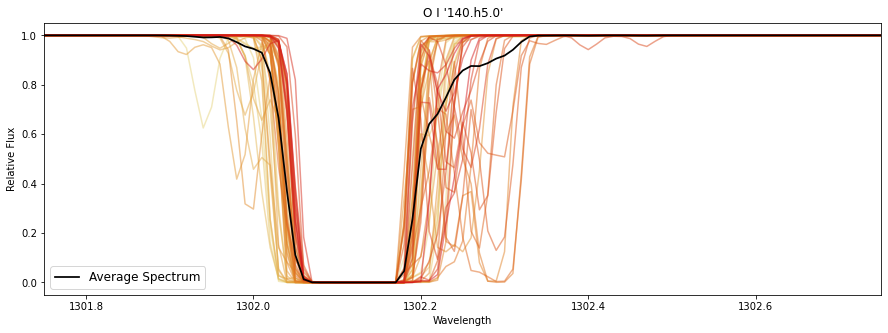

In [21]:
OI1302 = spec_avg(0.91,0,0.493,0.91,1,0.493, 13,4, 'O I' ,1301.75,1302.75)

## Si II 1304

yt : [INFO     ] 2022-02-08 20:35:08,242 Getting segment at z = 0.0: [0.455  0.     0.2465] unitary to [0.455  0.5    0.2465] unitary.
/Users/sofimar/opt/anaconda3/envs/yt_st/lib/python3.9/site-packages/yt/units/yt_array.py:1416: RuntimeWarning: invalid value encountered in true_divide
  out_arr = func(np.asarray(inps[0]), np.asarray(inps[1]),
yt : [INFO     ] 2022-02-08 20:35:08,243 Getting subsegment: [0.45500000000000007 unitary, 0.0 unitary, 0.24650000000000002 unitary] to [0.45500000000000007 unitary, 0.5 unitary, 0.24650000000000002 unitary].
yt : [INFO     ] 2022-02-08 20:35:08,886 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-02-08 20:35:08,961 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-02-08 20:35:08,962 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-02-08 20:35:08,962 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-02-08 20:35:08,962 Parameters: domain_right_edge     

yt : [INFO     ] 2022-02-08 20:35:13,690 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-02-08 20:35:13,766 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-02-08 20:35:13,767 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-02-08 20:35:13,767 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-02-08 20:35:13,767 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2022-02-08 20:35:13,768 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2022-02-08 20:35:13,768 Setting instrument to Custom
yt : [INFO     ] 2022-02-08 20:35:13,778 Allocating for 2.560e+02 particles (index particle type 'all')
yt : [INFO     ] 2022-02-08 20:35:13,781 Identified 1.210e+02 octs
yt : [INFO     ] 2022-02-08 20:35:13,867 Creating Si_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-02-08 20:35:13,870 Creating spectrum
Add

yt : [INFO     ] 2022-02-08 20:35:18,464 Setting instrument to Custom
yt : [INFO     ] 2022-02-08 20:35:18,474 Allocating for 2.560e+02 particles (index particle type 'all')
yt : [INFO     ] 2022-02-08 20:35:18,477 Identified 1.210e+02 octs
yt : [INFO     ] 2022-02-08 20:35:18,563 Creating Si_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-02-08 20:35:18,566 Creating spectrum
Adding line - Si II 1304 [1304.370000 A]: : 100%|██████████| 256/256 [00:00<00:00, 4423.02it/s]
yt : [INFO     ] 2022-02-08 20:35:18,651 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-02-08 20:35:18,662 Getting segment at z = 0.0: [0.45890625 0.         0.25235937] unitary to [0.45890625 0.5        0.25235937] unitary.
yt : [INFO     ] 2022-02-08 20:35:18,663 Getting subsegment: [0.45890625000000007 unitary, 0.0 unitary, 0.252359375 unitary] to [0.45890625000000007 unitary, 0.5 unitary, 0.252359375 unitary].
yt : [INFO     ] 2022-02-08 20:35:19,308 Saving fiel

yt : [INFO     ] 2022-02-08 20:35:23,346 Getting segment at z = 0.0: [0.4628125 0.        0.2465   ] unitary to [0.4628125 0.5       0.2465   ] unitary.
yt : [INFO     ] 2022-02-08 20:35:23,347 Getting subsegment: [0.4628125 unitary, 0.0 unitary, 0.24650000000000002 unitary] to [0.4628125 unitary, 0.5 unitary, 0.24650000000000002 unitary].
yt : [INFO     ] 2022-02-08 20:35:23,986 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-02-08 20:35:24,062 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-02-08 20:35:24,062 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-02-08 20:35:24,063 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-02-08 20:35:24,063 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2022-02-08 20:35:24,063 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2022-02-08 20:35:24,064 Setting instrument to Custom
yt : [IN

yt : [INFO     ] 2022-02-08 20:35:28,672 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-02-08 20:35:28,672 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2022-02-08 20:35:28,672 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2022-02-08 20:35:28,673 Setting instrument to Custom
yt : [INFO     ] 2022-02-08 20:35:28,683 Allocating for 2.560e+02 particles (index particle type 'all')
yt : [INFO     ] 2022-02-08 20:35:28,686 Identified 1.210e+02 octs
yt : [INFO     ] 2022-02-08 20:35:28,772 Creating Si_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-02-08 20:35:28,775 Creating spectrum
Adding line - Si II 1304 [1304.370000 A]: : 100%|██████████| 256/256 [00:00<00:00, 4442.14it/s]
yt : [INFO     ] 2022-02-08 20:35:28,860 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-02-08 20:35:28,871 Getting segment at z = 0.0: [0.46476563 0.       

yt : [INFO     ] 2022-02-08 20:35:33,414 Creating Si_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-02-08 20:35:33,417 Creating spectrum
Adding line - Si II 1304 [1304.370000 A]: : 100%|██████████| 256/256 [00:00<00:00, 4544.88it/s]
yt : [INFO     ] 2022-02-08 20:35:33,500 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-02-08 20:35:33,511 Getting segment at z = 0.0: [0.46671875 0.         0.25235937] unitary to [0.46671875 0.5        0.25235937] unitary.
yt : [INFO     ] 2022-02-08 20:35:33,512 Getting subsegment: [0.46671875000000007 unitary, 0.0 unitary, 0.252359375 unitary] to [0.46671875000000007 unitary, 0.5 unitary, 0.252359375 unitary].
yt : [INFO     ] 2022-02-08 20:35:34,144 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-02-08 20:35:34,220 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-02-08 20:35:34,220 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-02-08

yt : [INFO     ] 2022-02-08 20:35:38,820 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-02-08 20:35:38,895 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-02-08 20:35:38,896 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-02-08 20:35:38,896 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-02-08 20:35:38,896 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2022-02-08 20:35:38,896 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2022-02-08 20:35:38,897 Setting instrument to Custom
yt : [INFO     ] 2022-02-08 20:35:38,907 Allocating for 2.560e+02 particles (index particle type 'all')
yt : [INFO     ] 2022-02-08 20:35:38,910 Identified 1.210e+02 octs
yt : [INFO     ] 2022-02-08 20:35:38,998 Creating Si_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-02-08 20:35:39,001 Creating spectrum
Add

yt : [INFO     ] 2022-02-08 20:35:43,594 Setting instrument to Custom
yt : [INFO     ] 2022-02-08 20:35:43,603 Allocating for 2.560e+02 particles (index particle type 'all')
yt : [INFO     ] 2022-02-08 20:35:43,607 Identified 1.210e+02 octs
yt : [INFO     ] 2022-02-08 20:35:43,691 Creating Si_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-02-08 20:35:43,694 Creating spectrum
Adding line - Si II 1304 [1304.370000 A]: : 100%|██████████| 256/256 [00:00<00:00, 4626.26it/s]
yt : [INFO     ] 2022-02-08 20:35:43,776 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-02-08 20:35:43,787 Getting segment at z = 0.0: [0.47257813 0.         0.25040625] unitary to [0.47257813 0.5        0.25040625] unitary.
yt : [INFO     ] 2022-02-08 20:35:43,788 Getting subsegment: [0.47257812500000007 unitary, 0.0 unitary, 0.25040625000000005 unitary] to [0.47257812500000007 unitary, 0.5 unitary, 0.25040625000000005 unitary].
yt : [INFO     ] 2022-02-08 20:35:44

yt : [INFO     ] 2022-02-08 20:35:48,465 Getting segment at z = 0.0: [0.47453125 0.         0.25235937] unitary to [0.47453125 0.5        0.25235937] unitary.
yt : [INFO     ] 2022-02-08 20:35:48,466 Getting subsegment: [0.47453125 unitary, 0.0 unitary, 0.252359375 unitary] to [0.47453125 unitary, 0.5 unitary, 0.252359375 unitary].
yt : [INFO     ] 2022-02-08 20:35:49,117 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-02-08 20:35:49,193 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-02-08 20:35:49,193 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-02-08 20:35:49,193 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-02-08 20:35:49,194 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2022-02-08 20:35:49,194 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2022-02-08 20:35:49,195 Setting instrument to Custom
yt : [INFO     ]

yt : [INFO     ] 2022-02-08 20:35:53,870 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-02-08 20:35:53,870 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-02-08 20:35:53,871 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2022-02-08 20:35:53,871 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2022-02-08 20:35:53,872 Setting instrument to Custom
yt : [INFO     ] 2022-02-08 20:35:53,881 Allocating for 2.560e+02 particles (index particle type 'all')
yt : [INFO     ] 2022-02-08 20:35:53,885 Identified 1.210e+02 octs
yt : [INFO     ] 2022-02-08 20:35:53,969 Creating Si_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-02-08 20:35:53,972 Creating spectrum
Adding line - Si II 1304 [1304.370000 A]: : 100%|██████████| 256/256 [00:00<00:00, 4601.42it/s]
yt : [INFO     ] 2022-02-08 20:35:54,054 Writing spectrum to ascii file: spec.txt.
y

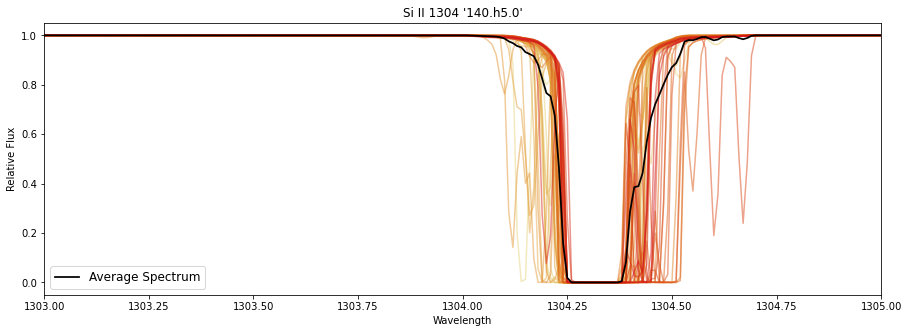

In [31]:
Si1304 = spec_avg(0.91,0,0.493,0.91,1,0.493, 13,4, 'Si II 1304' ,1303,1305)

## C II 1335

yt : [INFO     ] 2022-02-08 20:32:44,540 Getting segment at z = 0.0: [0.455  0.     0.2465] unitary to [0.455  0.5    0.2465] unitary.
/Users/sofimar/opt/anaconda3/envs/yt_st/lib/python3.9/site-packages/yt/units/yt_array.py:1416: RuntimeWarning: invalid value encountered in true_divide
  out_arr = func(np.asarray(inps[0]), np.asarray(inps[1]),
yt : [INFO     ] 2022-02-08 20:32:44,542 Getting subsegment: [0.45500000000000007 unitary, 0.0 unitary, 0.24650000000000002 unitary] to [0.45500000000000007 unitary, 0.5 unitary, 0.24650000000000002 unitary].
yt : [INFO     ] 2022-02-08 20:32:45,238 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-02-08 20:32:45,315 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-02-08 20:32:45,316 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-02-08 20:32:45,316 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-02-08 20:32:45,316 Parameters: domain_right_edge     

yt : [INFO     ] 2022-02-08 20:32:49,903 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-02-08 20:32:49,903 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-02-08 20:32:49,903 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-02-08 20:32:49,904 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2022-02-08 20:32:49,904 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2022-02-08 20:32:49,905 Setting instrument to Custom
yt : [INFO     ] 2022-02-08 20:32:49,915 Allocating for 2.560e+02 particles (index particle type 'all')
yt : [INFO     ] 2022-02-08 20:32:49,919 Identified 1.210e+02 octs
yt : [INFO     ] 2022-02-08 20:32:50,009 Creating C_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-02-08 20:32:50,013 Creating spectrum
Adding line - C II 1335 [1334.532000 A]: : 100%|██████████| 256/256 [00:00<00:00, 5368

yt : [INFO     ] 2022-02-08 20:32:54,497 Allocating for 2.560e+02 particles (index particle type 'all')
yt : [INFO     ] 2022-02-08 20:32:54,501 Identified 1.210e+02 octs
yt : [INFO     ] 2022-02-08 20:32:54,589 Creating C_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-02-08 20:32:54,592 Creating spectrum
Adding line - C II 1335 [1334.532000 A]: : 100%|██████████| 256/256 [00:00<00:00, 5357.00it/s]
yt : [INFO     ] 2022-02-08 20:32:54,668 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-02-08 20:32:54,680 Getting segment at z = 0.0: [0.45890625 0.         0.25235937] unitary to [0.45890625 0.5        0.25235937] unitary.
yt : [INFO     ] 2022-02-08 20:32:54,681 Getting subsegment: [0.45890625000000007 unitary, 0.0 unitary, 0.252359375 unitary] to [0.45890625000000007 unitary, 0.5 unitary, 0.252359375 unitary].
yt : [INFO     ] 2022-02-08 20:32:55,314 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-02-08 20:32:55,391 P

yt : [INFO     ] 2022-02-08 20:32:59,490 Getting subsegment: [0.4628125 unitary, 0.0 unitary, 0.24650000000000002 unitary] to [0.4628125 unitary, 0.5 unitary, 0.24650000000000002 unitary].
yt : [INFO     ] 2022-02-08 20:33:00,182 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-02-08 20:33:00,258 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-02-08 20:33:00,259 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-02-08 20:33:00,259 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-02-08 20:33:00,259 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2022-02-08 20:33:00,259 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2022-02-08 20:33:00,260 Setting instrument to Custom
yt : [INFO     ] 2022-02-08 20:33:00,270 Allocating for 2.560e+02 particles (index particle type 'all')
yt : [INFO     ] 2022-02-08 20:33:00,274 Identified 1.210

yt : [INFO     ] 2022-02-08 20:33:04,953 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2022-02-08 20:33:04,954 Setting instrument to Custom
yt : [INFO     ] 2022-02-08 20:33:04,964 Allocating for 2.560e+02 particles (index particle type 'all')
yt : [INFO     ] 2022-02-08 20:33:04,967 Identified 1.210e+02 octs
yt : [INFO     ] 2022-02-08 20:33:05,054 Creating C_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-02-08 20:33:05,057 Creating spectrum
Adding line - C II 1335 [1334.532000 A]: : 100%|██████████| 256/256 [00:00<00:00, 5322.77it/s]
yt : [INFO     ] 2022-02-08 20:33:05,133 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-02-08 20:33:05,144 Getting segment at z = 0.0: [0.46476563 0.         0.25040625] unitary to [0.46476563 0.5        0.25040625] unitary.
yt : [INFO     ] 2022-02-08 20:33:05,145 Getting subsegment: [0.46476562500000007 unitary, 0.0 unitary, 0.25040625000000005 unitary] to [0.46476562500000007 unita

yt : [INFO     ] 2022-02-08 20:33:15,191 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-02-08 20:33:15,191 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-02-08 20:33:15,191 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-02-08 20:33:15,192 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2022-02-08 20:33:15,192 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2022-02-08 20:33:15,193 Setting instrument to Custom
yt : [INFO     ] 2022-02-08 20:33:15,203 Allocating for 2.560e+02 particles (index particle type 'all')
yt : [INFO     ] 2022-02-08 20:33:15,206 Identified 1.210e+02 octs
yt : [INFO     ] 2022-02-08 20:33:15,372 Creating C_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-02-08 20:33:15,375 Creating spectrum
Adding line - C II 1335 [1334.532000 A]: : 100%|██████████| 256/256 [00:00<00:00, 5683

yt : [INFO     ] 2022-02-08 20:33:19,921 Allocating for 2.560e+02 particles (index particle type 'all')
yt : [INFO     ] 2022-02-08 20:33:19,924 Identified 1.210e+02 octs
yt : [INFO     ] 2022-02-08 20:33:20,011 Creating C_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-02-08 20:33:20,014 Creating spectrum
Adding line - C II 1335 [1334.532000 A]: : 100%|██████████| 256/256 [00:00<00:00, 5383.24it/s]
yt : [INFO     ] 2022-02-08 20:33:20,089 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-02-08 20:33:20,100 Getting segment at z = 0.0: [0.47257813 0.         0.25040625] unitary to [0.47257813 0.5        0.25040625] unitary.
yt : [INFO     ] 2022-02-08 20:33:20,101 Getting subsegment: [0.47257812500000007 unitary, 0.0 unitary, 0.25040625000000005 unitary] to [0.47257812500000007 unitary, 0.5 unitary, 0.25040625000000005 unitary].
yt : [INFO     ] 2022-02-08 20:33:20,755 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-02-0

yt : [INFO     ] 2022-02-08 20:33:24,751 Getting subsegment: [0.47453125 unitary, 0.0 unitary, 0.252359375 unitary] to [0.47453125 unitary, 0.5 unitary, 0.252359375 unitary].
yt : [INFO     ] 2022-02-08 20:33:25,400 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-02-08 20:33:25,476 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-02-08 20:33:25,477 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-02-08 20:33:25,477 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-02-08 20:33:25,477 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2022-02-08 20:33:25,478 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2022-02-08 20:33:25,479 Setting instrument to Custom
yt : [INFO     ] 2022-02-08 20:33:25,488 Allocating for 2.560e+02 particles (index particle type 'all')
yt : [INFO     ] 2022-02-08 20:33:25,492 Identified 1.210e+02 octs
yt :

yt : [INFO     ] 2022-02-08 20:33:30,111 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2022-02-08 20:33:30,112 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2022-02-08 20:33:30,113 Setting instrument to Custom
yt : [INFO     ] 2022-02-08 20:33:30,122 Allocating for 2.560e+02 particles (index particle type 'all')
yt : [INFO     ] 2022-02-08 20:33:30,126 Identified 1.210e+02 octs
yt : [INFO     ] 2022-02-08 20:33:30,213 Creating C_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-02-08 20:33:30,216 Creating spectrum
Adding line - C II 1335 [1334.532000 A]: : 100%|██████████| 256/256 [00:00<00:00, 5535.98it/s]
yt : [INFO     ] 2022-02-08 20:33:30,290 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-02-08 20:33:30,301 Getting segment at z = 0.0: [0.4784375  0.         0.24845312] unitary to [0.4784375  0.5        0.24845312] unitary.
yt : [INFO     ] 2022-02-08 20:33:30,

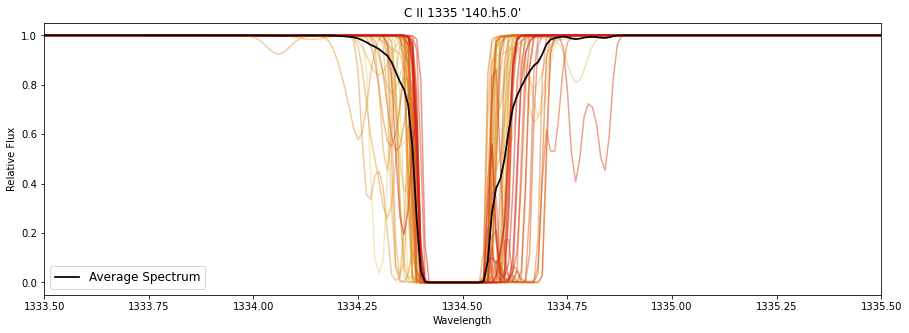

In [28]:
CII1335 = spec_avg(0.91,0,0.493,0.91,1,0.493, 13,4, 'C II 1335' ,1333.5,1335.5)

## Si IV 1393

yt : [INFO     ] 2022-02-08 20:40:06,353 Getting segment at z = 0.0: [0.455  0.     0.2465] unitary to [0.455  0.5    0.2465] unitary.
/Users/sofimar/opt/anaconda3/envs/yt_st/lib/python3.9/site-packages/yt/units/yt_array.py:1416: RuntimeWarning: invalid value encountered in true_divide
  out_arr = func(np.asarray(inps[0]), np.asarray(inps[1]),
yt : [INFO     ] 2022-02-08 20:40:06,356 Getting subsegment: [0.45500000000000007 unitary, 0.0 unitary, 0.24650000000000002 unitary] to [0.45500000000000007 unitary, 0.5 unitary, 0.24650000000000002 unitary].
yt : [INFO     ] 2022-02-08 20:40:06,990 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-02-08 20:40:07,069 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-02-08 20:40:07,070 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-02-08 20:40:07,070 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-02-08 20:40:07,070 Parameters: domain_right_edge     

yt : [INFO     ] 2022-02-08 20:40:11,547 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-02-08 20:40:11,625 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-02-08 20:40:11,625 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-02-08 20:40:11,626 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-02-08 20:40:11,626 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2022-02-08 20:40:11,626 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2022-02-08 20:40:11,627 Setting instrument to Custom
yt : [INFO     ] 2022-02-08 20:40:11,637 Allocating for 2.560e+02 particles (index particle type 'all')
yt : [INFO     ] 2022-02-08 20:40:11,641 Identified 1.210e+02 octs
yt : [INFO     ] 2022-02-08 20:40:11,732 Creating Si_p3_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-02-08 20:40:11,735 Creating spectrum
Add

yt : [INFO     ] 2022-02-08 20:40:16,128 Setting instrument to Custom
yt : [INFO     ] 2022-02-08 20:40:16,138 Allocating for 2.560e+02 particles (index particle type 'all')
yt : [INFO     ] 2022-02-08 20:40:16,141 Identified 1.210e+02 octs
yt : [INFO     ] 2022-02-08 20:40:16,229 Creating Si_p3_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-02-08 20:40:16,232 Creating spectrum
Adding line - Si IV 1393 [1393.760000 A]: : 100%|██████████| 256/256 [00:00<00:00, 7299.90it/s]
yt : [INFO     ] 2022-02-08 20:40:16,296 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-02-08 20:40:16,309 Getting segment at z = 0.0: [0.45890625 0.         0.25235937] unitary to [0.45890625 0.5        0.25235937] unitary.
yt : [INFO     ] 2022-02-08 20:40:16,310 Getting subsegment: [0.45890625000000007 unitary, 0.0 unitary, 0.252359375 unitary] to [0.45890625000000007 unitary, 0.5 unitary, 0.252359375 unitary].
yt : [INFO     ] 2022-02-08 20:40:16,929 Saving fiel

yt : [INFO     ] 2022-02-08 20:40:20,819 Getting segment at z = 0.0: [0.4628125 0.        0.2465   ] unitary to [0.4628125 0.5       0.2465   ] unitary.
yt : [INFO     ] 2022-02-08 20:40:20,820 Getting subsegment: [0.4628125 unitary, 0.0 unitary, 0.24650000000000002 unitary] to [0.4628125 unitary, 0.5 unitary, 0.24650000000000002 unitary].
yt : [INFO     ] 2022-02-08 20:40:21,440 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-02-08 20:40:21,516 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-02-08 20:40:21,516 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-02-08 20:40:21,517 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-02-08 20:40:21,517 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2022-02-08 20:40:21,517 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2022-02-08 20:40:21,518 Setting instrument to Custom
yt : [IN

yt : [INFO     ] 2022-02-08 20:40:25,984 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-02-08 20:40:25,984 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2022-02-08 20:40:25,984 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2022-02-08 20:40:25,985 Setting instrument to Custom
yt : [INFO     ] 2022-02-08 20:40:25,995 Allocating for 2.560e+02 particles (index particle type 'all')
yt : [INFO     ] 2022-02-08 20:40:25,999 Identified 1.210e+02 octs
yt : [INFO     ] 2022-02-08 20:40:26,085 Creating Si_p3_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-02-08 20:40:26,088 Creating spectrum
Adding line - Si IV 1393 [1393.760000 A]: : 100%|██████████| 256/256 [00:00<00:00, 7499.40it/s]
yt : [INFO     ] 2022-02-08 20:40:26,151 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-02-08 20:40:26,163 Getting segment at z = 0.0: [0.46476563 0.       

yt : [INFO     ] 2022-02-08 20:40:30,577 Creating Si_p3_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-02-08 20:40:30,580 Creating spectrum
Adding line - Si IV 1393 [1393.760000 A]: : 100%|██████████| 256/256 [00:00<00:00, 7353.59it/s]
yt : [INFO     ] 2022-02-08 20:40:30,646 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-02-08 20:40:30,658 Getting segment at z = 0.0: [0.46671875 0.         0.25235937] unitary to [0.46671875 0.5        0.25235937] unitary.
yt : [INFO     ] 2022-02-08 20:40:30,659 Getting subsegment: [0.46671875000000007 unitary, 0.0 unitary, 0.252359375 unitary] to [0.46671875000000007 unitary, 0.5 unitary, 0.252359375 unitary].
yt : [INFO     ] 2022-02-08 20:40:31,294 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-02-08 20:40:31,373 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-02-08 20:40:31,373 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-02-08

yt : [INFO     ] 2022-02-08 20:40:35,881 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-02-08 20:40:35,957 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-02-08 20:40:35,957 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-02-08 20:40:35,958 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-02-08 20:40:35,958 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2022-02-08 20:40:35,958 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2022-02-08 20:40:35,959 Setting instrument to Custom
yt : [INFO     ] 2022-02-08 20:40:35,969 Allocating for 2.560e+02 particles (index particle type 'all')
yt : [INFO     ] 2022-02-08 20:40:35,973 Identified 1.210e+02 octs
yt : [INFO     ] 2022-02-08 20:40:36,060 Creating Si_p3_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-02-08 20:40:36,063 Creating spectrum
Add

yt : [INFO     ] 2022-02-08 20:40:40,485 Setting instrument to Custom
yt : [INFO     ] 2022-02-08 20:40:40,495 Allocating for 2.560e+02 particles (index particle type 'all')
yt : [INFO     ] 2022-02-08 20:40:40,498 Identified 1.210e+02 octs
yt : [INFO     ] 2022-02-08 20:40:40,585 Creating Si_p3_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-02-08 20:40:40,588 Creating spectrum
Adding line - Si IV 1393 [1393.760000 A]: : 100%|██████████| 256/256 [00:00<00:00, 7607.31it/s]
yt : [INFO     ] 2022-02-08 20:40:40,651 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-02-08 20:40:40,662 Getting segment at z = 0.0: [0.47257813 0.         0.25040625] unitary to [0.47257813 0.5        0.25040625] unitary.
yt : [INFO     ] 2022-02-08 20:40:40,663 Getting subsegment: [0.47257812500000007 unitary, 0.0 unitary, 0.25040625000000005 unitary] to [0.47257812500000007 unitary, 0.5 unitary, 0.25040625000000005 unitary].
yt : [INFO     ] 2022-02-08 20:40:41

yt : [INFO     ] 2022-02-08 20:40:45,124 Getting segment at z = 0.0: [0.47453125 0.         0.25235937] unitary to [0.47453125 0.5        0.25235937] unitary.
yt : [INFO     ] 2022-02-08 20:40:45,125 Getting subsegment: [0.47453125 unitary, 0.0 unitary, 0.252359375 unitary] to [0.47453125 unitary, 0.5 unitary, 0.252359375 unitary].
yt : [INFO     ] 2022-02-08 20:40:45,828 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-02-08 20:40:45,905 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-02-08 20:40:45,905 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-02-08 20:40:45,905 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-02-08 20:40:45,906 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2022-02-08 20:40:45,906 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2022-02-08 20:40:45,907 Setting instrument to Custom
yt : [INFO     ]

yt : [INFO     ] 2022-02-08 20:40:50,358 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-02-08 20:40:50,359 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-02-08 20:40:50,359 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2022-02-08 20:40:50,359 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2022-02-08 20:40:50,360 Setting instrument to Custom
yt : [INFO     ] 2022-02-08 20:40:50,370 Allocating for 2.560e+02 particles (index particle type 'all')
yt : [INFO     ] 2022-02-08 20:40:50,374 Identified 1.210e+02 octs
yt : [INFO     ] 2022-02-08 20:40:50,461 Creating Si_p3_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-02-08 20:40:50,464 Creating spectrum
Adding line - Si IV 1393 [1393.760000 A]: : 100%|██████████| 256/256 [00:00<00:00, 7649.26it/s]
yt : [INFO     ] 2022-02-08 20:40:50,527 Writing spectrum to ascii file: spec.txt.
y

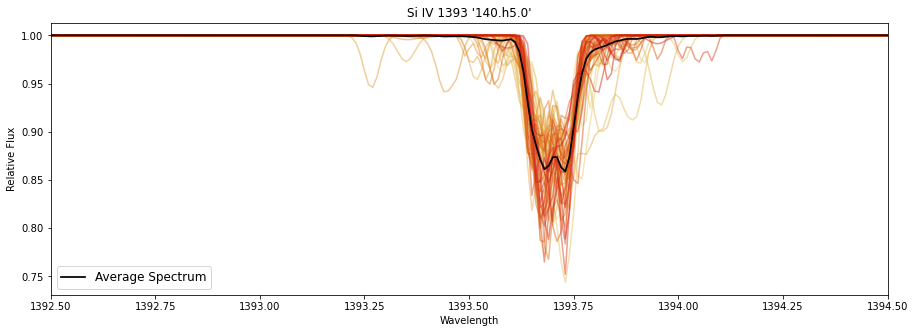

In [33]:
SiIV1393 = spec_avg(0.91,0,0.493,0.91,1,0.493, 13,4, 'Si IV 1393',1392.5,1394.5,
                   el='Si', rom_num='IV', lrest=1393.76, gamma=9.0E+8, f_value=5.24E-01, 
                   amu=28.08,DIY=True)

## Al III 1854

In [1]:
10/256

0.0390625

yt : [INFO     ] 2022-02-08 20:34:20,695 Getting segment at z = 0.0: [0.455  0.     0.2465] unitary to [0.455  0.5    0.2465] unitary.
/Users/sofimar/opt/anaconda3/envs/yt_st/lib/python3.9/site-packages/yt/units/yt_array.py:1416: RuntimeWarning: invalid value encountered in true_divide
  out_arr = func(np.asarray(inps[0]), np.asarray(inps[1]),
yt : [INFO     ] 2022-02-08 20:34:20,696 Getting subsegment: [0.45500000000000007 unitary, 0.0 unitary, 0.24650000000000002 unitary] to [0.45500000000000007 unitary, 0.5 unitary, 0.24650000000000002 unitary].
yt : [INFO     ] 2022-02-08 20:34:21,335 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-02-08 20:34:21,411 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-02-08 20:34:21,411 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-02-08 20:34:21,411 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-02-08 20:34:21,412 Parameters: domain_right_edge     

yt : [INFO     ] 2022-02-08 20:34:25,906 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-02-08 20:34:25,982 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-02-08 20:34:25,982 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-02-08 20:34:25,982 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-02-08 20:34:25,983 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2022-02-08 20:34:25,983 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2022-02-08 20:34:25,984 Setting instrument to Custom
yt : [INFO     ] 2022-02-08 20:34:25,994 Allocating for 2.560e+02 particles (index particle type 'all')
yt : [INFO     ] 2022-02-08 20:34:25,997 Identified 1.210e+02 octs
yt : [INFO     ] 2022-02-08 20:34:26,083 Creating Al_p2_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-02-08 20:34:26,086 Creating spectrum
Add

yt : [INFO     ] 2022-02-08 20:34:30,567 Setting instrument to Custom
yt : [INFO     ] 2022-02-08 20:34:30,577 Allocating for 2.560e+02 particles (index particle type 'all')
yt : [INFO     ] 2022-02-08 20:34:30,580 Identified 1.210e+02 octs
yt : [INFO     ] 2022-02-08 20:34:30,665 Creating Al_p2_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-02-08 20:34:30,668 Creating spectrum
Adding line - Al III 1854 [1854.720000 A]: : 100%|██████████| 256/256 [00:00<00:00, 7272.11it/s]
yt : [INFO     ] 2022-02-08 20:34:30,731 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-02-08 20:34:30,742 Getting segment at z = 0.0: [0.45890625 0.         0.25235937] unitary to [0.45890625 0.5        0.25235937] unitary.
yt : [INFO     ] 2022-02-08 20:34:30,743 Getting subsegment: [0.45890625000000007 unitary, 0.0 unitary, 0.252359375 unitary] to [0.45890625000000007 unitary, 0.5 unitary, 0.252359375 unitary].
yt : [INFO     ] 2022-02-08 20:34:31,387 Saving fie

yt : [INFO     ] 2022-02-08 20:34:35,298 Getting segment at z = 0.0: [0.4628125 0.        0.2465   ] unitary to [0.4628125 0.5       0.2465   ] unitary.
yt : [INFO     ] 2022-02-08 20:34:35,299 Getting subsegment: [0.4628125 unitary, 0.0 unitary, 0.24650000000000002 unitary] to [0.4628125 unitary, 0.5 unitary, 0.24650000000000002 unitary].
yt : [INFO     ] 2022-02-08 20:34:35,935 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-02-08 20:34:36,011 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-02-08 20:34:36,011 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-02-08 20:34:36,012 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-02-08 20:34:36,012 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2022-02-08 20:34:36,012 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2022-02-08 20:34:36,013 Setting instrument to Custom
yt : [IN

yt : [INFO     ] 2022-02-08 20:34:40,555 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-02-08 20:34:40,555 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2022-02-08 20:34:40,556 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2022-02-08 20:34:40,557 Setting instrument to Custom
yt : [INFO     ] 2022-02-08 20:34:40,566 Allocating for 2.560e+02 particles (index particle type 'all')
yt : [INFO     ] 2022-02-08 20:34:40,569 Identified 1.210e+02 octs
yt : [INFO     ] 2022-02-08 20:34:40,655 Creating Al_p2_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-02-08 20:34:40,657 Creating spectrum
Adding line - Al III 1854 [1854.720000 A]: : 100%|██████████| 256/256 [00:00<00:00, 7104.99it/s]
yt : [INFO     ] 2022-02-08 20:34:40,721 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-02-08 20:34:40,732 Getting segment at z = 0.0: [0.46476563 0.      

yt : [INFO     ] 2022-02-08 20:34:45,209 Creating Al_p2_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-02-08 20:34:45,212 Creating spectrum
Adding line - Al III 1854 [1854.720000 A]: : 100%|██████████| 256/256 [00:00<00:00, 7121.01it/s]
yt : [INFO     ] 2022-02-08 20:34:45,275 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-02-08 20:34:45,286 Getting segment at z = 0.0: [0.46671875 0.         0.25235937] unitary to [0.46671875 0.5        0.25235937] unitary.
yt : [INFO     ] 2022-02-08 20:34:45,287 Getting subsegment: [0.46671875000000007 unitary, 0.0 unitary, 0.252359375 unitary] to [0.46671875000000007 unitary, 0.5 unitary, 0.252359375 unitary].
yt : [INFO     ] 2022-02-08 20:34:45,931 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-02-08 20:34:46,007 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-02-08 20:34:46,008 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-02-0

yt : [INFO     ] 2022-02-08 20:34:50,479 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-02-08 20:34:50,554 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-02-08 20:34:50,555 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-02-08 20:34:50,555 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-02-08 20:34:50,555 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2022-02-08 20:34:50,556 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2022-02-08 20:34:50,557 Setting instrument to Custom
yt : [INFO     ] 2022-02-08 20:34:50,566 Allocating for 2.560e+02 particles (index particle type 'all')
yt : [INFO     ] 2022-02-08 20:34:50,569 Identified 1.210e+02 octs
yt : [INFO     ] 2022-02-08 20:34:50,654 Creating Al_p2_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-02-08 20:34:50,657 Creating spectrum
Add

yt : [INFO     ] 2022-02-08 20:34:55,099 Setting instrument to Custom
yt : [INFO     ] 2022-02-08 20:34:55,109 Allocating for 2.560e+02 particles (index particle type 'all')
yt : [INFO     ] 2022-02-08 20:34:55,112 Identified 1.210e+02 octs
yt : [INFO     ] 2022-02-08 20:34:55,197 Creating Al_p2_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-02-08 20:34:55,199 Creating spectrum
Adding line - Al III 1854 [1854.720000 A]: : 100%|██████████| 256/256 [00:00<00:00, 6935.78it/s]
yt : [INFO     ] 2022-02-08 20:34:55,264 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-02-08 20:34:55,275 Getting segment at z = 0.0: [0.47257813 0.         0.25040625] unitary to [0.47257813 0.5        0.25040625] unitary.
yt : [INFO     ] 2022-02-08 20:34:55,276 Getting subsegment: [0.47257812500000007 unitary, 0.0 unitary, 0.25040625000000005 unitary] to [0.47257812500000007 unitary, 0.5 unitary, 0.25040625000000005 unitary].
yt : [INFO     ] 2022-02-08 20:34:5

yt : [INFO     ] 2022-02-08 20:34:59,818 Getting segment at z = 0.0: [0.47453125 0.         0.25235937] unitary to [0.47453125 0.5        0.25235937] unitary.
yt : [INFO     ] 2022-02-08 20:34:59,819 Getting subsegment: [0.47453125 unitary, 0.0 unitary, 0.252359375 unitary] to [0.47453125 unitary, 0.5 unitary, 0.252359375 unitary].
yt : [INFO     ] 2022-02-08 20:35:00,459 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-02-08 20:35:00,535 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-02-08 20:35:00,535 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-02-08 20:35:00,535 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-02-08 20:35:00,536 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2022-02-08 20:35:00,536 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2022-02-08 20:35:00,537 Setting instrument to Custom
yt : [INFO     ]

yt : [INFO     ] 2022-02-08 20:35:05,122 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-02-08 20:35:05,123 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-02-08 20:35:05,123 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2022-02-08 20:35:05,123 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2022-02-08 20:35:05,124 Setting instrument to Custom
yt : [INFO     ] 2022-02-08 20:35:05,134 Allocating for 2.560e+02 particles (index particle type 'all')
yt : [INFO     ] 2022-02-08 20:35:05,137 Identified 1.210e+02 octs
yt : [INFO     ] 2022-02-08 20:35:05,221 Creating Al_p2_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-02-08 20:35:05,224 Creating spectrum
Adding line - Al III 1854 [1854.720000 A]: : 100%|██████████| 256/256 [00:00<00:00, 7038.16it/s]
yt : [INFO     ] 2022-02-08 20:35:05,288 Writing spectrum to ascii file: spec.txt.


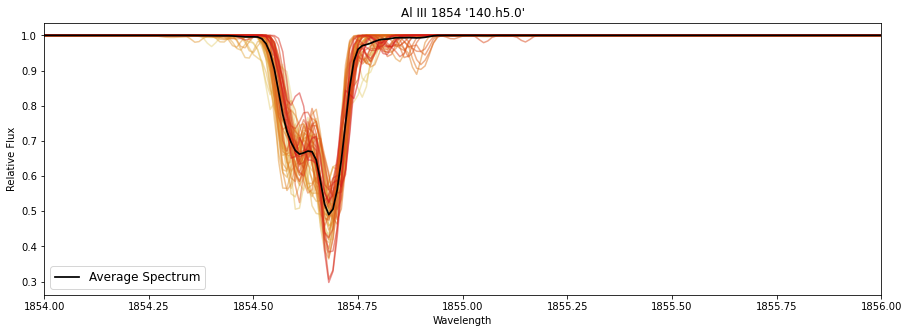

In [30]:
AlIII = spec_avg(0.91,0,0.493,0.91,1,0.493, 13,4, 'Al III 1854',1854,1856,
                el='Al', rom_num='III', lrest=1854.72, gamma=5.57E+08, f_value=5.75E-01, 
                amu=26.98,DIY=True)

## Fe II 2600

yt : [INFO     ] 2022-02-08 20:31:06,610 Getting segment at z = 0.0: [0.455  0.     0.2465] unitary to [0.455  0.5    0.2465] unitary.
/Users/sofimar/opt/anaconda3/envs/yt_st/lib/python3.9/site-packages/yt/units/yt_array.py:1416: RuntimeWarning: invalid value encountered in true_divide
  out_arr = func(np.asarray(inps[0]), np.asarray(inps[1]),
yt : [INFO     ] 2022-02-08 20:31:06,612 Getting subsegment: [0.45500000000000007 unitary, 0.0 unitary, 0.24650000000000002 unitary] to [0.45500000000000007 unitary, 0.5 unitary, 0.24650000000000002 unitary].
yt : [INFO     ] 2022-02-08 20:31:07,248 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-02-08 20:31:07,325 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-02-08 20:31:07,325 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-02-08 20:31:07,325 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-02-08 20:31:07,326 Parameters: domain_right_edge     

yt : [INFO     ] 2022-02-08 20:31:11,876 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-02-08 20:31:11,953 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-02-08 20:31:11,953 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-02-08 20:31:11,953 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-02-08 20:31:11,954 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2022-02-08 20:31:11,954 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2022-02-08 20:31:11,955 Setting instrument to Custom
yt : [INFO     ] 2022-02-08 20:31:11,966 Allocating for 2.560e+02 particles (index particle type 'all')
yt : [INFO     ] 2022-02-08 20:31:11,969 Identified 1.210e+02 octs
yt : [INFO     ] 2022-02-08 20:31:12,056 Creating Fe_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-02-08 20:31:12,059 Creating spectrum
Add

yt : [INFO     ] 2022-02-08 20:31:16,604 Setting instrument to Custom
yt : [INFO     ] 2022-02-08 20:31:16,615 Allocating for 2.560e+02 particles (index particle type 'all')
yt : [INFO     ] 2022-02-08 20:31:16,618 Identified 1.210e+02 octs
yt : [INFO     ] 2022-02-08 20:31:16,709 Creating Fe_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-02-08 20:31:16,712 Creating spectrum
Adding line - Fe II 2600 [2600.170000 A]: : 100%|██████████| 256/256 [00:00<00:00, 5406.56it/s]
yt : [INFO     ] 2022-02-08 20:31:16,790 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-02-08 20:31:16,803 Getting segment at z = 0.0: [0.45890625 0.         0.25235937] unitary to [0.45890625 0.5        0.25235937] unitary.
yt : [INFO     ] 2022-02-08 20:31:16,804 Getting subsegment: [0.45890625000000007 unitary, 0.0 unitary, 0.252359375 unitary] to [0.45890625000000007 unitary, 0.5 unitary, 0.252359375 unitary].
yt : [INFO     ] 2022-02-08 20:31:17,537 Saving fiel

yt : [INFO     ] 2022-02-08 20:31:21,582 Getting segment at z = 0.0: [0.4628125 0.        0.2465   ] unitary to [0.4628125 0.5       0.2465   ] unitary.
yt : [INFO     ] 2022-02-08 20:31:21,583 Getting subsegment: [0.4628125 unitary, 0.0 unitary, 0.24650000000000002 unitary] to [0.4628125 unitary, 0.5 unitary, 0.24650000000000002 unitary].
yt : [INFO     ] 2022-02-08 20:31:22,221 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-02-08 20:31:22,297 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-02-08 20:31:22,298 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-02-08 20:31:22,298 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-02-08 20:31:22,298 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2022-02-08 20:31:22,299 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2022-02-08 20:31:22,300 Setting instrument to Custom
yt : [IN

yt : [INFO     ] 2022-02-08 20:31:26,892 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-02-08 20:31:26,892 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2022-02-08 20:31:26,893 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2022-02-08 20:31:26,894 Setting instrument to Custom
yt : [INFO     ] 2022-02-08 20:31:26,904 Allocating for 2.560e+02 particles (index particle type 'all')
yt : [INFO     ] 2022-02-08 20:31:26,908 Identified 1.210e+02 octs
yt : [INFO     ] 2022-02-08 20:31:26,999 Creating Fe_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-02-08 20:31:27,003 Creating spectrum
Adding line - Fe II 2600 [2600.170000 A]: : 100%|██████████| 256/256 [00:00<00:00, 5233.65it/s]
yt : [INFO     ] 2022-02-08 20:31:27,083 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-02-08 20:31:27,095 Getting segment at z = 0.0: [0.46476563 0.       

yt : [INFO     ] 2022-02-08 20:31:31,695 Creating Fe_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-02-08 20:31:31,698 Creating spectrum
Adding line - Fe II 2600 [2600.170000 A]: : 100%|██████████| 256/256 [00:00<00:00, 5608.73it/s]
yt : [INFO     ] 2022-02-08 20:31:31,772 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-02-08 20:31:31,784 Getting segment at z = 0.0: [0.46671875 0.         0.25235937] unitary to [0.46671875 0.5        0.25235937] unitary.
yt : [INFO     ] 2022-02-08 20:31:31,785 Getting subsegment: [0.46671875000000007 unitary, 0.0 unitary, 0.252359375 unitary] to [0.46671875000000007 unitary, 0.5 unitary, 0.252359375 unitary].
yt : [INFO     ] 2022-02-08 20:31:32,420 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-02-08 20:31:32,497 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-02-08 20:31:32,497 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-02-08

yt : [INFO     ] 2022-02-08 20:31:37,086 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-02-08 20:31:37,164 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-02-08 20:31:37,165 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-02-08 20:31:37,165 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-02-08 20:31:37,166 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2022-02-08 20:31:37,166 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2022-02-08 20:31:37,167 Setting instrument to Custom
yt : [INFO     ] 2022-02-08 20:31:37,177 Allocating for 2.560e+02 particles (index particle type 'all')
yt : [INFO     ] 2022-02-08 20:31:37,181 Identified 1.210e+02 octs
yt : [INFO     ] 2022-02-08 20:31:37,269 Creating Fe_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-02-08 20:31:37,272 Creating spectrum
Add

yt : [INFO     ] 2022-02-08 20:31:41,850 Setting instrument to Custom
yt : [INFO     ] 2022-02-08 20:31:41,860 Allocating for 2.560e+02 particles (index particle type 'all')
yt : [INFO     ] 2022-02-08 20:31:41,864 Identified 1.210e+02 octs
yt : [INFO     ] 2022-02-08 20:31:41,952 Creating Fe_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-02-08 20:31:41,955 Creating spectrum
Adding line - Fe II 2600 [2600.170000 A]: : 100%|██████████| 256/256 [00:00<00:00, 5198.18it/s]
yt : [INFO     ] 2022-02-08 20:31:42,034 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-02-08 20:31:42,045 Getting segment at z = 0.0: [0.47257813 0.         0.25040625] unitary to [0.47257813 0.5        0.25040625] unitary.
yt : [INFO     ] 2022-02-08 20:31:42,046 Getting subsegment: [0.47257812500000007 unitary, 0.0 unitary, 0.25040625000000005 unitary] to [0.47257812500000007 unitary, 0.5 unitary, 0.25040625000000005 unitary].
yt : [INFO     ] 2022-02-08 20:31:42

yt : [INFO     ] 2022-02-08 20:31:46,788 Getting segment at z = 0.0: [0.47453125 0.         0.25235937] unitary to [0.47453125 0.5        0.25235937] unitary.
yt : [INFO     ] 2022-02-08 20:31:46,789 Getting subsegment: [0.47453125 unitary, 0.0 unitary, 0.252359375 unitary] to [0.47453125 unitary, 0.5 unitary, 0.252359375 unitary].
yt : [INFO     ] 2022-02-08 20:31:47,445 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-02-08 20:31:47,526 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-02-08 20:31:47,526 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-02-08 20:31:47,526 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-02-08 20:31:47,527 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2022-02-08 20:31:47,527 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2022-02-08 20:31:47,528 Setting instrument to Custom
yt : [INFO     ]

yt : [INFO     ] 2022-02-08 20:31:52,260 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-02-08 20:31:52,260 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-02-08 20:31:52,261 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2022-02-08 20:31:52,261 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2022-02-08 20:31:52,262 Setting instrument to Custom
yt : [INFO     ] 2022-02-08 20:31:52,272 Allocating for 2.560e+02 particles (index particle type 'all')
yt : [INFO     ] 2022-02-08 20:31:52,275 Identified 1.210e+02 octs
yt : [INFO     ] 2022-02-08 20:31:52,363 Creating Fe_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-02-08 20:31:52,366 Creating spectrum
Adding line - Fe II 2600 [2600.170000 A]: : 100%|██████████| 256/256 [00:00<00:00, 5278.16it/s]
yt : [INFO     ] 2022-02-08 20:31:52,443 Writing spectrum to ascii file: spec.txt.
y

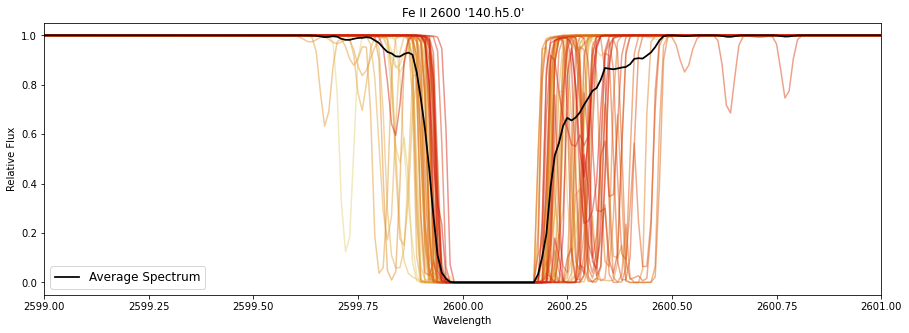

In [26]:
FeII = spec_avg(0.91,0,0.493,0.91,1,0.493, 13,4, 'Fe II 2600',2599, 2601,
                el='Fe', rom_num='II', lrest=2600.17, gamma=2.37E+08, f_value=2.4E-01, 
                amu=55.85,DIY=True)

## Mg II 2796

yt : [INFO     ] 2022-02-08 20:38:36,625 Getting segment at z = 0.0: [0.455  0.     0.2465] unitary to [0.455  0.5    0.2465] unitary.
/Users/sofimar/opt/anaconda3/envs/yt_st/lib/python3.9/site-packages/yt/units/yt_array.py:1416: RuntimeWarning: invalid value encountered in true_divide
  out_arr = func(np.asarray(inps[0]), np.asarray(inps[1]),
yt : [INFO     ] 2022-02-08 20:38:36,628 Getting subsegment: [0.45500000000000007 unitary, 0.0 unitary, 0.24650000000000002 unitary] to [0.45500000000000007 unitary, 0.5 unitary, 0.24650000000000002 unitary].
yt : [INFO     ] 2022-02-08 20:38:37,287 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-02-08 20:38:37,370 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-02-08 20:38:37,370 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-02-08 20:38:37,370 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-02-08 20:38:37,371 Parameters: domain_right_edge     

yt : [INFO     ] 2022-02-08 20:38:42,000 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-02-08 20:38:42,077 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-02-08 20:38:42,077 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-02-08 20:38:42,077 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-02-08 20:38:42,078 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2022-02-08 20:38:42,078 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2022-02-08 20:38:42,079 Setting instrument to Custom
yt : [INFO     ] 2022-02-08 20:38:42,090 Allocating for 2.560e+02 particles (index particle type 'all')
yt : [INFO     ] 2022-02-08 20:38:42,093 Identified 1.210e+02 octs
yt : [INFO     ] 2022-02-08 20:38:42,182 Creating Mg_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-02-08 20:38:42,185 Creating spectrum
Add

yt : [INFO     ] 2022-02-08 20:38:46,827 Setting instrument to Custom
yt : [INFO     ] 2022-02-08 20:38:46,837 Allocating for 2.560e+02 particles (index particle type 'all')
yt : [INFO     ] 2022-02-08 20:38:46,840 Identified 1.210e+02 octs
yt : [INFO     ] 2022-02-08 20:38:46,927 Creating Mg_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-02-08 20:38:46,930 Creating spectrum
Adding line - Mg II 2796 [2796.350000 A]: : 100%|██████████| 256/256 [00:00<00:00, 4457.60it/s]
yt : [INFO     ] 2022-02-08 20:38:47,017 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-02-08 20:38:47,029 Getting segment at z = 0.0: [0.45890625 0.         0.25235937] unitary to [0.45890625 0.5        0.25235937] unitary.
yt : [INFO     ] 2022-02-08 20:38:47,030 Getting subsegment: [0.45890625000000007 unitary, 0.0 unitary, 0.252359375 unitary] to [0.45890625000000007 unitary, 0.5 unitary, 0.252359375 unitary].
yt : [INFO     ] 2022-02-08 20:38:47,675 Saving fiel

yt : [INFO     ] 2022-02-08 20:38:51,837 Getting segment at z = 0.0: [0.4628125 0.        0.2465   ] unitary to [0.4628125 0.5       0.2465   ] unitary.
yt : [INFO     ] 2022-02-08 20:38:51,838 Getting subsegment: [0.4628125 unitary, 0.0 unitary, 0.24650000000000002 unitary] to [0.4628125 unitary, 0.5 unitary, 0.24650000000000002 unitary].
yt : [INFO     ] 2022-02-08 20:38:52,488 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-02-08 20:38:52,564 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-02-08 20:38:52,564 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-02-08 20:38:52,564 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-02-08 20:38:52,565 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2022-02-08 20:38:52,565 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2022-02-08 20:38:52,566 Setting instrument to Custom
yt : [IN

yt : [INFO     ] 2022-02-08 20:38:57,266 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-02-08 20:38:57,267 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2022-02-08 20:38:57,267 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2022-02-08 20:38:57,268 Setting instrument to Custom
yt : [INFO     ] 2022-02-08 20:38:57,278 Allocating for 2.560e+02 particles (index particle type 'all')
yt : [INFO     ] 2022-02-08 20:38:57,281 Identified 1.210e+02 octs
yt : [INFO     ] 2022-02-08 20:38:57,380 Creating Mg_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-02-08 20:38:57,383 Creating spectrum
Adding line - Mg II 2796 [2796.350000 A]: : 100%|██████████| 256/256 [00:00<00:00, 4438.60it/s]
yt : [INFO     ] 2022-02-08 20:38:57,470 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-02-08 20:38:57,482 Getting segment at z = 0.0: [0.46476563 0.       

yt : [INFO     ] 2022-02-08 20:39:02,110 Creating Mg_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-02-08 20:39:02,113 Creating spectrum
Adding line - Mg II 2796 [2796.350000 A]: : 100%|██████████| 256/256 [00:00<00:00, 4504.03it/s]
yt : [INFO     ] 2022-02-08 20:39:02,198 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-02-08 20:39:02,210 Getting segment at z = 0.0: [0.46671875 0.         0.25235937] unitary to [0.46671875 0.5        0.25235937] unitary.
yt : [INFO     ] 2022-02-08 20:39:02,212 Getting subsegment: [0.46671875000000007 unitary, 0.0 unitary, 0.252359375 unitary] to [0.46671875000000007 unitary, 0.5 unitary, 0.252359375 unitary].
yt : [INFO     ] 2022-02-08 20:39:02,852 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-02-08 20:39:02,927 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-02-08 20:39:02,928 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-02-08

yt : [INFO     ] 2022-02-08 20:39:07,618 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-02-08 20:39:07,695 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-02-08 20:39:07,695 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-02-08 20:39:07,695 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-02-08 20:39:07,696 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2022-02-08 20:39:07,696 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2022-02-08 20:39:07,697 Setting instrument to Custom
yt : [INFO     ] 2022-02-08 20:39:07,707 Allocating for 2.560e+02 particles (index particle type 'all')
yt : [INFO     ] 2022-02-08 20:39:07,711 Identified 1.210e+02 octs
yt : [INFO     ] 2022-02-08 20:39:07,800 Creating Mg_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-02-08 20:39:07,803 Creating spectrum
Add

yt : [INFO     ] 2022-02-08 20:39:12,631 Setting instrument to Custom
yt : [INFO     ] 2022-02-08 20:39:12,641 Allocating for 2.560e+02 particles (index particle type 'all')
yt : [INFO     ] 2022-02-08 20:39:12,645 Identified 1.210e+02 octs
yt : [INFO     ] 2022-02-08 20:39:12,733 Creating Mg_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-02-08 20:39:12,737 Creating spectrum
Adding line - Mg II 2796 [2796.350000 A]: : 100%|██████████| 256/256 [00:00<00:00, 4408.95it/s]
yt : [INFO     ] 2022-02-08 20:39:12,826 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-02-08 20:39:12,839 Getting segment at z = 0.0: [0.47257813 0.         0.25040625] unitary to [0.47257813 0.5        0.25040625] unitary.
yt : [INFO     ] 2022-02-08 20:39:12,840 Getting subsegment: [0.47257812500000007 unitary, 0.0 unitary, 0.25040625000000005 unitary] to [0.47257812500000007 unitary, 0.5 unitary, 0.25040625000000005 unitary].
yt : [INFO     ] 2022-02-08 20:39:13

yt : [INFO     ] 2022-02-08 20:39:17,700 Getting segment at z = 0.0: [0.47453125 0.         0.25235937] unitary to [0.47453125 0.5        0.25235937] unitary.
yt : [INFO     ] 2022-02-08 20:39:17,701 Getting subsegment: [0.47453125 unitary, 0.0 unitary, 0.252359375 unitary] to [0.47453125 unitary, 0.5 unitary, 0.252359375 unitary].
yt : [INFO     ] 2022-02-08 20:39:18,370 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2022-02-08 20:39:18,451 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-02-08 20:39:18,451 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-02-08 20:39:18,452 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-02-08 20:39:18,452 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2022-02-08 20:39:18,452 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2022-02-08 20:39:18,453 Setting instrument to Custom
yt : [INFO     ]

yt : [INFO     ] 2022-02-08 20:39:23,362 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-02-08 20:39:23,362 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-02-08 20:39:23,362 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2022-02-08 20:39:23,363 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2022-02-08 20:39:23,364 Setting instrument to Custom
yt : [INFO     ] 2022-02-08 20:39:23,374 Allocating for 2.560e+02 particles (index particle type 'all')
yt : [INFO     ] 2022-02-08 20:39:23,378 Identified 1.210e+02 octs
yt : [INFO     ] 2022-02-08 20:39:23,468 Creating Mg_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-02-08 20:39:23,470 Creating spectrum
Adding line - Mg II 2796 [2796.350000 A]: : 100%|██████████| 256/256 [00:00<00:00, 4201.53it/s]
yt : [INFO     ] 2022-02-08 20:39:23,565 Writing spectrum to ascii file: spec.txt.
y

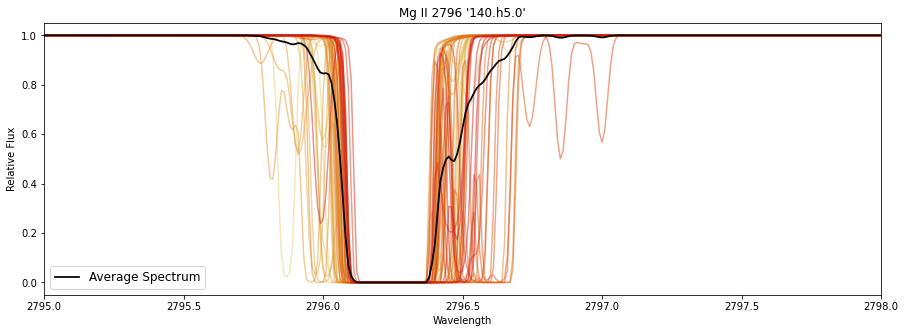

In [32]:
MgII = spec_avg(0.91,0,0.493,0.91,1,0.493, 13,4, 'Mg II 2796',2795, 2798,
                el='Mg', rom_num='II', lrest=2796.35, gamma=2.68E+08, f_value=6.29E-01, 
                amu=24.31,DIY=True)